# 1 Project Idea: 

## Comparative Analysis of Data Cleaning in Python and R


## 1.1 Introduction 

This project explores the red and white wine datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality), with a focus on comparative data cleaning and preparation. 

The approach integrates real-world winemaking standards, including EU regulations and OIV guidelines, to ensure chemical plausibility, legal consistency, and contextual insight.

The goal is to identify and preserve meaningful variability while removing noise, ultimately producing clean, structured datasets for future modeling or reporting tasks.

Emphasizing methodical thinking, attention to detail, and reproducibility, the analysis goes beyond standard statistical thresholds by incorporating chemical plausibility and relevant international benchmarks. Where applicable—particularly for sulfur dioxide, alcohol, and other regulated compounds—thresholds from the International Code of Oenological Practices (OIV) are considered.

Scientific insights into the nature of each variable support the cleaning process, without diverting from the main objective: to produce clean, interpretable data suitable for modeling and further analysis.

The red and white wine datasets are treated separately to ensure clarity and consistency throughout the workflow.

Objectives:

* Demonstrate a domain-aware data cleaning process focused on outlier detection and evaluation

* Explore the distribution of physicochemical variables across both red and white wines

* Identify and visualize potential outliers

* Decide whether to remove, retain, or flag each outlier based on context and plausibility

* Produce a reproducible, interpretable dataset for downstream analysis

* Ensure clarity through structured documentation, visualizations, and transparent code



## 1.2 Data Sources and Tools 


### 1.2.1 Data Sources

The original datasets used in this project were obtained from the UCI Machine Learning Repository. The data was contributed by Paulo Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis, and is distributed under the Creative Commons Attribution license.

Two datasets are included, corresponding to red and white Vinho Verde wine samples from northern Portugal. Each entry represents a wine sample with 11 physicochemical variables and one quality score based on sensory evaluation. The objective of the original dataset is to model wine quality based on measurable chemical properties.



### 1.2.2 Tools and Environment

This notebook was developed in R (v4.4.2) using a Jupyter Notebook environment. 
Initial drafts were occasionally reviewed in Posit Cloud and RStudio Desktop.
Key libraries include:

- **tidyverse** – data manipulation and visualization

- **readxl** – Excel file import

- **skimr** – compact data summaries

- **here** – reproducible file paths

- **janitor** – data cleaning utilities

- **conflicted** – function name conflict management


All code is designed to be fully reproducible. The data is stored locally with backups maintained on Posit Cloud for accessibility and reliability.

### 1.2.3 Reproducibility & Version Control

Code and data are versioned and stored securely. 

### 1.2.4 Comparative Framing: Python vs R for Data Cleaning

This analysis is part of a broader project aimed at evaluating the effectiveness of R and Python for real-world data cleaning workflows. The two environments are tested side by side on the same datasets, using consistent logic, criteria, and decision points.

By developing a parallel workflow across both languages, this project aims to assess:

- the clarity and expressiveness of syntax in each language;

- the efficiency and flexibility of standard packages for data manipulation and visualization;

- the ability to document, automate, and scale the cleaning process in a reproducible and structured way.

Although both languages are highly capable, each has particular strengths depending on the task. This project explores not just which tool is "better," but how each supports strategic thinking and technical transparency in data preparation — a critical phase in any data science or machine learning pipeline.

For a mirrored version of this analysis in Python, please refer to the companion notebook:  
[Comparative Analysis of R and Python for Data Cleaning – Python Version](#)  
*(click hee to view)[https://github.com/VirginiaYonit/wine_data_analysis/blob/main/02_data_cleaning_wine_Python.ipynb]*

## 1.3 Contents

- [Introduction](#introduction)
- [Data Sources and Tools](#data-sources-and-tools)
- [Variable Descriptions](#variable-descriptions)
- [Data Collection and Preparation](#data-collection-and-preparation)
- [Red Wine Analysis](#red-wine-analysis)
- [White Wine Analysis](#white-wine-analysis)
- [Comparative Decision Table](#comparative-decision-table)
- [Final Remarks](#final-remarks--cleaning-outcomes)



## 1.4 Variable Descriptions 


**These definitions apply to both red and white wine datasets.**

- **fixed_acidity**: Concentration of tartaric acid (primary acid in grapes), impacts freshness and structure.
- **volatile_acidity**: Mainly acetic acid, contributes to aroma but excessive levels lead to vinegary notes.
- **citric_acid**: Adds freshness and complexity; can contribute to balance.
- **residual_sugar**: Sugar left after fermentation; affects sweetness and body.
- **chlorides**: Indicates saltiness, influenced by soil and water; high levels may affect flavor.
- **free_sulfur_dioxide**: Active SO₂ available to protect wine from oxidation/microbes.
- **total_sulfur_dioxide**: Sum of free and bound SO₂; high levels may affect aroma and require labeling.
- **density**: Indicates dissolved substances (sugar, alcohol); helps infer sweetness.
- **pH**: Measures acidity/basicity; affects microbial stability and sensory freshness.
- **sulphates**: Help prevent microbial spoilage and contribute to mouthfeel.Too much can cause headaches or affect taste.
- **alcohol**: Final ethanol concentration (% vol); reflects sugar conversion during fermentation.
- **quality**: Sensory evaluation score (integer); subjectively assigned by experts.


In [1]:
# Import necessary libraries
library(tidyverse)  # Essential for data manipulation and visualization, includes packages like ggplot2, dplyr (data manipulation tasks such as filtering rows, selecting columns, and arranging data), and tidyr.
library(skimr)      # Provides compact and flexible summaries of data frames.
library(here)       # Simplifies path management in R projects by constructing paths relative to the top-level directory.
library(janitor)    # Useful for cleaning variable names and other data cleaning tasks.
library(conflicted) # Use the conflicted package to manage conflicts
library(readxl)

Warning message:
"il pacchetto 'tidyverse' è stato creato con R versione 4.4.3"
Warning message:
"il pacchetto 'tidyr' è stato creato con R versione 4.4.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"il pacchetto 'skimr' è stato creato con R versione 4.4.3"
Warning message:
"il pacchetto 'here' è stato creato con R versione 4.4.3"
here() starts at C:/Users/Pc/OneDrive/Formazione/DataScience/Portfolio/wine_project

Warn

In [2]:
# Set dplyr::filter and dplyr::lag as defaults to avoid conflicts
filter <- dplyr::filter
lag <- dplyr::lag

## 1.5 Data Collection and Preparation 


### 1.5.1 From Understanding to Preparation

The analysis is based on two datasets:
- **Red Wine**: 1,599 rows and 12 variables  
- **White Wine**: 4,898 rows and 12 variables

The variables are identical across both datasets and represent a mix of physicochemical test results and sensory ratings.

Initial inspection confirms:
- No duplicate records
- Clean and consistent variable names (lowercase, snake_case)

These characteristics make the datasets ready for structured cleaning and contextual analysis.


In [3]:
# -------------------------------------------------------------
#  pH INCIDENT LOG: A true story of data, decimals, and despair
# -------------------------------------------------------------
# It began with a single number: pH = 33
# Was it wine, or nuclear waste? We may never know.

# The culprit: read_csv2() + locale mismatch 🇪🇺
# The fix: read_delim() + proper decimal interpretation (hallelujah!)

# Moral of the story:
# Always question your data. Especially when your wine starts burning holes in the plot.
# -------------------------------------------------------------


red_wine <- read_delim(
  "winequality-red.csv",
  delim = ";",
  locale = locale(decimal_mark = ".", grouping_mark = "")
)

white_wine <- read_delim(
  "winequality-white.csv",
  delim = ";",
  locale = locale(decimal_mark = ".", grouping_mark = "")
)


Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Checking for duplicates
print(paste("Duplicates in red wine dataset:", sum(duplicated(red_wine))))
print(paste("Duplicates in white wine dataset:", sum(duplicated(white_wine))))

# Removing duplicates
red_wine <- red_wine %>% distinct()
white_wine <- white_wine %>% distinct()



[1] "Duplicates in red wine dataset: 240"
[1] "Duplicates in white wine dataset: 937"


In [5]:
# Display the first rows of the red and white wine datasets
head(red_wine)
head(white_wine)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6
8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0,6


* The Red Wine dataset consists in 1599 rows and 12 columns.
* The White Wine dataset consists in 4898 rows and 12 columns.
* Column names are in common for both datasets.
* All data types hold numeric values with decimal points (dbl).

### 1.5.2 Data Cleaning Strategy

The cleaning process combines statistical methods with contextual and regulatory knowledge to ensure plausibility and consistency.

Key steps include:
- Defining variable-specific cleaning criteria  
- Detecting outliers based on distribution and chemical ranges  
- Retaining stylistic variability when scientifically justified  
- Removing implausible values according to EU and OIV thresholds  
- Comparing red vs. white wine profiles to highlight production differences



In [6]:
# Replace spaces in column names with underscores for consistency
colnames(red_wine) = gsub(" ", "_", colnames(red_wine))
colnames(white_wine) = gsub(" ", "_", colnames(white_wine))

In [7]:
# Summary statistics for red and white wine datasets
summary(red_wine)
summary(white_wine)

 fixed_acidity    volatile_acidity  citric_acid     residual_sugar  
 Min.   : 4.600   Min.   :0.1200   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 7.100   1st Qu.:0.3900   1st Qu.:0.0900   1st Qu.: 1.900  
 Median : 7.900   Median :0.5200   Median :0.2600   Median : 2.200  
 Mean   : 8.311   Mean   :0.5295   Mean   :0.2723   Mean   : 2.523  
 3rd Qu.: 9.200   3rd Qu.:0.6400   3rd Qu.:0.4300   3rd Qu.: 2.600  
 Max.   :15.900   Max.   :1.5800   Max.   :1.0000   Max.   :15.500  
   chlorides       free_sulfur_dioxide total_sulfur_dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9967  
 Mean   :0.08812   Mean   :15.89       Mean   : 46.83       Mean   :0.9967  
 3rd Qu.:0.09100   3rd Qu.:21.00       3rd Qu.: 63.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00  

 fixed_acidity    volatile_acidity  citric_acid     residual_sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.600  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 4.700  
 Mean   : 6.839   Mean   :0.2805   Mean   :0.3343   Mean   : 5.915  
 3rd Qu.: 7.300   3rd Qu.:0.3300   3rd Qu.:0.3900   3rd Qu.: 8.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free_sulfur_dioxide total_sulfur_dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03500   1st Qu.: 23.00      1st Qu.:106.0        1st Qu.:0.9916  
 Median :0.04200   Median : 33.00      Median :133.0        Median :0.9935  
 Mean   :0.04591   Mean   : 34.89      Mean   :137.2        Mean   :0.9938  
 3rd Qu.:0.05000   3rd Qu.: 45.00      3rd Qu.:166.0        3rd Qu.:0.9957  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

In [8]:
# Checking for duplicates
print(paste("Duplicates in red wine dataset:", sum(duplicated(red_wine))))
print(paste("Duplicates in white wine dataset:", sum(duplicated(white_wine))))

# Removing duplicates
red_wine <- red_wine %>% distinct()
white_wine <- white_wine %>% distinct()


[1] "Duplicates in red wine dataset: 0"
[1] "Duplicates in white wine dataset: 0"


In [9]:
# remove spaces
# library(dplyr)

cols_to_clean <- c('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality')

red_wine <- red_wine %>%
  mutate(across(all_of(cols_to_clean), ~ trimws(.)))  

white_wine <- white_wine %>%
  mutate(across(all_of(cols_to_clean), ~ trimws(.))) 


After modifying the names of the columns, several columns were automatically imported as character types, unlike in Python. Therefore, I will need to explicitly convert them to their appropriate data types before proceeding with the analysis.

In [10]:
# Convert columns from character to numeric (if necessary)
red_wine <- red_wine %>%
  mutate(across(all_of(cols_to_clean), as.numeric))

sapply(red_wine, class)

white_wine <- white_wine %>%
  mutate(across(all_of(cols_to_clean), as.numeric))

sapply(white_wine, class)


fixed_acidity     volatile_acidity          citric_acid 
           "numeric"            "numeric"            "numeric" 
      residual_sugar            chlorides  free_sulfur_dioxide 
           "numeric"            "numeric"            "numeric" 
total_sulfur_dioxide              density                   pH 
           "numeric"            "numeric"            "numeric" 
           sulphates              alcohol              quality 
           "numeric"            "numeric"            "numeric"

fixed_acidity     volatile_acidity          citric_acid 
           "numeric"            "numeric"            "numeric" 
      residual_sugar            chlorides  free_sulfur_dioxide 
           "numeric"            "numeric"            "numeric" 
total_sulfur_dioxide              density                   pH 
           "numeric"            "numeric"            "numeric" 
           sulphates              alcohol              quality 
           "numeric"            "numeric"            "numeric"

In [11]:
# Check for any NA values and apply fallback replacement if needed
na_counts <- sapply(red_wine, function(x) sum(is.na(x)))

if (any(na_counts > 0)) {
  message("Missing values detected – applying mean imputation.")
  red_wine_clean <- red_wine %>%
    mutate(across(where(is.numeric), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))
} else {
  message("No missing values detected – no imputation applied.")
}


No missing values detected – no imputation applied.



**Import and Locale Issues: Lesson Learned**  
Although the original UCI Wine Quality datasets are clean and complete, a locale mismatch during CSV import caused significant numerical distortions — notably in the `pH` variable.  
Specifically, using `read_csv2()` with default settings interpreted decimal points incorrectly, inflating values by a factor of 10 or 100.  
  
The issue was resolved by switching to `read_delim()` with an explicit locale:

```r
read_delim("winequality-red.csv", delim = ";", locale = locale(decimal_mark = ".", grouping_mark = "))


```

This ensured correct parsing of both separators and decimal values, restoring all numeric fields (including `pH`) to their intended scale.


In [12]:
# Load precomputed summary of red wine outliers (from Excel)
outlier_summary_red <- readxl::read_xlsx("outlier_summary_red.xlsx")
outlier_summary_red


VARIABLE,UNIT,OUTLIER COUNT,LOWER BOUND,UPPER BOUND,MIN LEGAL LIMITS,MAX LEGAL LIMITS
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
fixed_acidity,g(ácido tartárico)/dm³,41,3.950,12.350,4.5,Not regulated
volatile_acidity,g(ácido acético)/dm³,19,0.015,1.015,Not regulated,1.2
citric_acid,g/dm³,1,-0.420,0.940,Not regulated,1
residual_sugar,g/dm³,126,0.850,3.650,Not regulated,Not regulated
chlorides,g(cloreto de sódio)/dm³,87,0.039,0.122,Not regulated,2
free_sulfur_dioxide,mg/litre,26,-14.000,42.000,Not regulated,160 mg/l
total_sulfur_dioxide,mg/litre,45,-39.500,124.500,Not regulated,150
density,g/dm³,35,0.992,1.001,Not regulated,Not regulated
pH,pH scale,28,2.925,3.685,Not regulated,Not regulated


In [13]:
# Load precomputed summary of white wine outliers from Excel
outlier_summary_white <- read_xlsx("outlier_summary_white.xlsx")
outlier_summary_white


VARIABLE,UNIT,OUTLIER COUNT,LOWER BOUND,UPPER BOUND,MIN LEGAL LIMITS,MAX LEGAL LIMITS
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
fixed_acidity,g(ácido tartárico)/dm³,106,4.800,8.800,4.5,Not regulated
volatile_acidity,g(ácido acético)/dm³,133,0.030,0.510,Not regulated,1.2
citric_acid,g/dm³,223,0.090,0.570,Not regulated,1
residual_sugar,g/dm³,16,-9.350,19.850,Not regulated,Not regulated
chlorides,g(cloreto de sódio)/dm³,178,0.013,0.073,Not regulated,1
free_sulfur_dioxide,mg/litre,44,-10.000,78.000,Not regulated,"160,00 mg/l"
total_sulfur_dioxide,mg/litre,14,16.000,256.000,Not regulated,400
density,g/dm³,6,0.985,1.002,Not regulated,Not regulated
pH,pH scale,46,2.790,3.590,Not regulated,Not regulated


In [14]:
# Check for negative values in all numeric columns
negatives_check <- sapply(red_wine, function(x) any(x < 0, na.rm = TRUE))
negatives_check


fixed_acidity     volatile_acidity          citric_acid 
               FALSE                FALSE                FALSE 
      residual_sugar            chlorides  free_sulfur_dioxide 
               FALSE                FALSE                FALSE 
total_sulfur_dioxide              density                   pH 
               FALSE                FALSE                FALSE 
           sulphates              alcohol              quality 
               FALSE                FALSE                FALSE

In [15]:
# Check for negative values in all numeric columns
negatives_check <- sapply(white_wine, function(x) any(x < 0, na.rm = TRUE))
negatives_check


fixed_acidity     volatile_acidity          citric_acid 
               FALSE                FALSE                FALSE 
      residual_sugar            chlorides  free_sulfur_dioxide 
               FALSE                FALSE                FALSE 
total_sulfur_dioxide              density                   pH 
               FALSE                FALSE                FALSE 
           sulphates              alcohol              quality 
               FALSE                FALSE                FALSE

Note: Some of the lower bounds reported in the summary table are negative.  
These values were generated as statistical thresholds based on the IQR method (Q1 - 1.5 × IQR),  
but they do not reflect actual data points. The dataset itself contains no negative values,  
and all variables are consistent with enological and physical expectations.

We created a reusable function in R to apply regulatory thresholds to the wine datasets. This supports consistency and clarity across multiple variables during data cleaning.

Example:
- Volatile Acidity → max 1.20 g/dm³
- Total SO₂ → max 400 mg/L for sweet wines


In [16]:
# Function to filter rows based on legal minimum and/or maximum values
filter_legal_range <- function(df, variable, min_val = NULL, max_val = NULL) {
  if (!is.null(min_val) & !is.null(max_val)) {
    df <- df[df[[variable]] >= min_val & df[[variable]] <= max_val, ]
  } else if (!is.null(min_val)) {
    df <- df[df[[variable]] >= min_val, ]
  } else if (!is.null(max_val)) {
    df <- df[df[[variable]] <= max_val, ]
  }
  return(df)
}


In [17]:
# Start with unfiltered red wine dataset
red_wine_clean <- filter_legal_range(red_wine, "fixed_acidity", min_val = 4.5)

# Apply successive filters on red_wine_clean using chemical/legal thresholds
red_wine_clean <- filter_legal_range(red_wine_clean, "volatile_acidity", max_val = 1.2)
red_wine_clean <- filter_legal_range(red_wine_clean, "citric_acid", max_val = 1.0)
red_wine_clean <- filter_legal_range(red_wine_clean, "chlorides", max_val = 2.0)
red_wine_clean <- filter_legal_range(red_wine_clean, "free_sulfur_dioxide", max_val = 160.0)
red_wine_clean <- filter_legal_range(red_wine_clean, "total_sulfur_dioxide", max_val = 150.0)
red_wine_clean <- filter_legal_range(red_wine_clean, "sulphates", max_val = 2.0)
red_wine_clean <- filter_legal_range(red_wine_clean, "alcohol", max_val = 14.5)
red_wine_clean <- filter_legal_range(red_wine_clean, "alcohol", min_val = 7.0)

In [18]:
# Apply the same filtering logic used for red_wine to the white_wine dataset, starting from fixed_acidity

white_wine_clean <- filter_legal_range(white_wine, "fixed_acidity", min_val = 4.5)
white_wine_clean <- filter_legal_range(white_wine_clean, "volatile_acidity", max_val = 1.2)
white_wine_clean <- filter_legal_range(white_wine_clean, "citric_acid", max_val = 1.0)
white_wine_clean <- filter_legal_range(white_wine_clean, "chlorides", max_val = 1.0)
white_wine_clean <- filter_legal_range(white_wine_clean, "free_sulfur_dioxide", max_val = 160)
white_wine_clean <- filter_legal_range(white_wine_clean, "total_sulfur_dioxide", max_val = 400)
white_wine_clean <- filter_legal_range(white_wine_clean, "sulphates", max_val = 2.0)
white_wine_clean <- filter_legal_range(white_wine_clean, "alcohol", max_val = 14.5)
white_wine_clean <- filter_legal_range(white_wine_clean, "alcohol", min_val = 7.0)

In [19]:
# --------------------------------------------------
# FUNCTION: Find outliers using the IQR method
# --------------------------------------------------
find_outliers <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  
  return(x[x < lower_bound | x > upper_bound])
}

# --------------------------------------------------
# TESTING the function one by one
# --------------------------------------------------
# find_outliers(red_wine_clean$volatile_acidity)

# --------------------------------------------------
# APPLY the function to all numeric columns
# --------------------------------------------------
outliers_per_column_red <- lapply(red_wine_clean[sapply(red_wine_clean, is.numeric)], find_outliers)

# --------------------------------------------------
# COUNT the number of outliers per variable
# --------------------------------------------------
outlier_counts_red <- sapply(outliers_per_column_red, length)

# Create a dataframe for visualization
outlier_red_df <- data.frame(
  variable = names(outlier_counts_red),
  count_red = outlier_counts_red
)
outlier_red_df


,variable,count_red
,<chr>,<int>
fixed_acidity,fixed_acidity,40
volatile_acidity,volatile_acidity,15
citric_acid,citric_acid,1
residual_sugar,residual_sugar,121
chlorides,chlorides,98
free_sulfur_dioxide,free_sulfur_dioxide,25
total_sulfur_dioxide,total_sulfur_dioxide,38
density,density,34
pH,pH,28


# 2 Red Wine Analysis



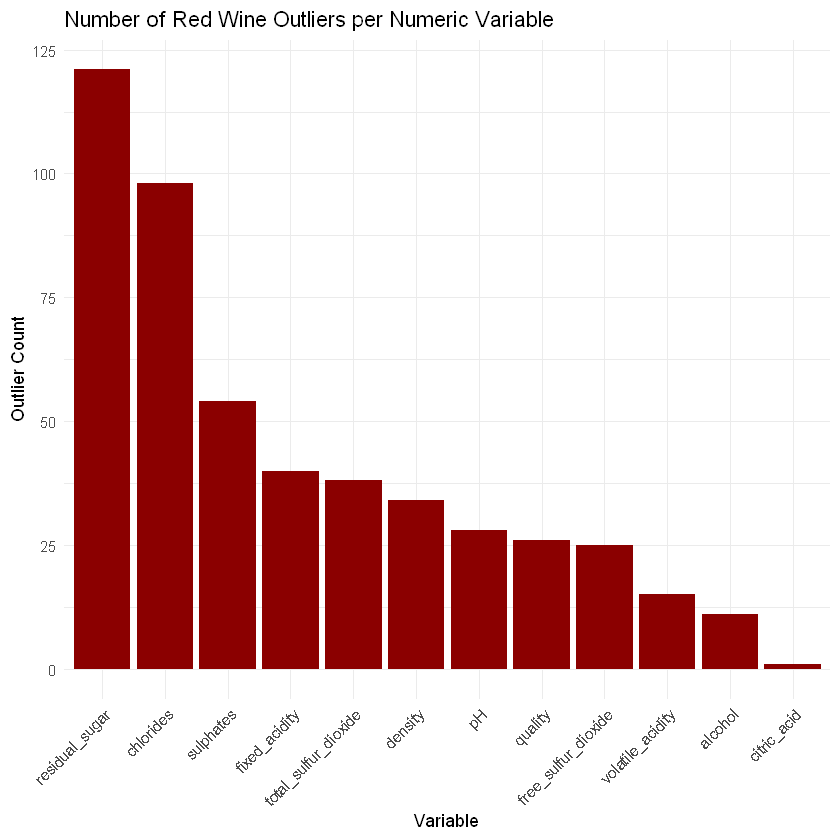

In [20]:
# Barplot showing the number of outliers per numeric variable (red wine)
ggplot(outlier_red_df, aes(x = reorder(variable, -count_red), y = count_red)) +
    geom_bar(stat = "identity", fill = "darkred") +
    labs(
        title = "Number of Red Wine Outliers per Numeric Variable",
        x = "Variable",
        y = "Outlier Count"
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
    


## 2.1 Fixed Acidity

**Definition**  
Fixed acidity refers to the non-volatile acids in wine, primarily tartaric and malic acid. These acids contribute to freshness, microbial stability, and aging potential. Fixed acidity does not evaporate during fermentation and is a fundamental component of the wine's acid profile.

**Summary Statistics**  
Values in the dataset range from 1.02 to 1.185 g/L. The distribution is tight, with a median of 1.04 and a 3rd quartile of 1.103. No values exceed the 1.2 g/L threshold often considered chemically implausible.

**Visual Inspection**  
The next plot helps to identify if high acidity values correspond to lower pH (as expected) or if there are inconsistent values that may indicate errors.

**Decision**  
All values fall within a chemically plausible range for high-acid white wines from cool climates. No legal thresholds are exceeded.  
KEEP

---

<details>
<summary> Additional Notes</summary>

- Wine is naturally acidic, with malic and tartaric acid being the most prominent. Fixed acidity is influenced by grape variety, soil composition, and climate.
- Grapes grown in potassium-rich soils tend to have higher pH, prompting winemakers to adjust acidity using tartaric acid additions.
- Vinho Verde, a cooler-climate region of Portugal, produces grapes with naturally high acidity. For red wines, fixed acidity typically stays below 9.
- Although higher values may appear extreme, they align with lower pH levels in the dataset, suggesting chemical consistency.
- Due to the absence of metadata (region, grape, vintage), it's unclear whether the extreme values reflect specific wine styles. Only fixed acidity values below 4.5 g/L (threshold based on enological practice) were removed. The remaining observations were retained.

</details>


`geom_smooth()` using formula = 'y ~ x'


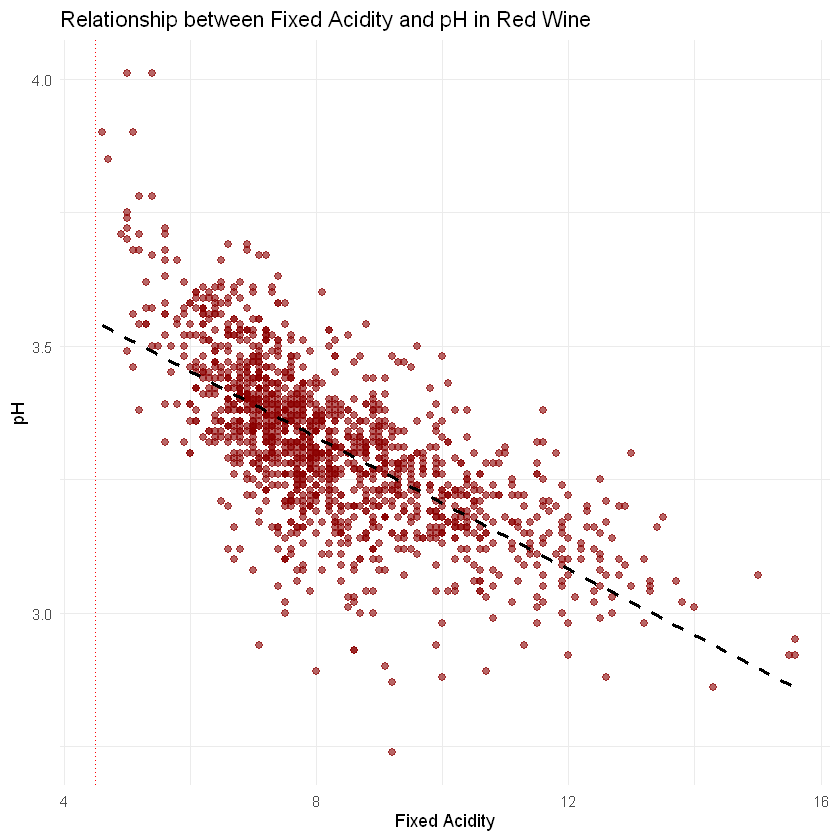

In [21]:
# Exploring the relationship between fixed acidity and pH in red wine
ggplot(red_wine_clean, aes(x = fixed_acidity, y = pH)) +
  geom_point(color = "darkred", alpha = 0.6, size = 2) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  geom_vline(xintercept = 4.5, color = "red", linetype = "dotted") +
  labs(
    title = "Relationship between Fixed Acidity and pH in Red Wine",
    x = "Fixed Acidity",
    y = "pH"
  ) +
  theme_minimal()


In [22]:
# Manually inspecting outliers for fixed_acidity
out_fa <- find_outliers(red_wine_clean$fixed_acidity)
summary(out_fa)
print(out_fa)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.40   12.50   12.80   13.16   13.32   15.60 

 [1] 12.8 15.0 12.5 13.3 13.4 12.4 12.5 13.8 13.5 12.6 12.5 12.8 14.0 13.7 12.7
[16] 12.5 12.8 12.6 15.6 12.5 13.0 12.5 13.3 12.4 12.5 12.9 14.3 12.4 15.5 15.6
[31] 13.0 12.7 12.4 12.7 13.2 13.2 13.3 12.9 12.6 12.6


In [23]:
# Create the decision table (initially empty)
outlier_decisions <- data.frame(
  wine_type = character(),      # NEW column: "red" or "white"
  variable = character(),
  num_outliers = integer(),
  reason = character(),
  decision = character(),
  stringsAsFactors = FALSE
)


# Example: Add your first decision (e.g., for volatile.acidity)
outlier_decisions <- rbind(outlier_decisions, data.frame(
  wine_type = "red",
  variable = "fixed_acidity",
  num_outliers = length(find_outliers(red_wine_clean$fixed_acidity)),
  reason = "Legal thresholds were enforced during preprocessing. No further filtering was required.",
  decision = "KEEP"
))


# View the table
print(outlier_decisions)


  wine_type      variable num_outliers
1       red fixed_acidity           40
                                                                                   reason
1 Legal thresholds were enforced during preprocessing. No further filtering was required.
  decision
1     KEEP


## 2.2 Volatile Acidity

**Definition**  
Volatile acidity (VA) refers to low molecular weight, steam-distillable acids—primarily acetic acid—that contribute to the aroma profile of wine. While low levels can enhance complexity, high VA is often associated with spoilage and is generally perceived as a vinegar-like aroma.

**Summary Statistics**  
Values in the red wine dataset range from 1.020 to 1.185 g/L, with a mean of 1.069. These values are unusually high and exceed typical sensory thresholds in most dry red wines. The distribution is narrow but centered well above the 1.0 g/L benchmark.

**Visual Inspection**  
The boxplot shows the relationship between Volatile Acidity and Quality in Red Wine 

**Decision**  
Only values exceeding the legal limit of 1.2 g/L were removed. All remaining values, though high, were retained due to their potential chemical plausibility and to preserve the natural variation observed in fermentation conditions.  
REMOVE above 1.2 g/L, KEEP the rest.

---

<details>
<summary> Additional Notes</summary>
    
- VA is commonly used as a diagnostic indicator of microbial spoilage. It may arise from damaged fruit or contamination by acetic acid bacteria.
- According to industry professionals like Alicia Towns Franken (VP, Archer Roose), VA is often subjective: “A little can be fantastic, but if it’s way out of balance, I find it less enjoyable.”
- A weak to moderate negative correlation was observed between VA and quality in the dataset.
- VA values above 1.2 g/L are generally considered legally and sensorially unacceptable and were removed accordingly.

</details>


`geom_smooth()` using formula = 'y ~ x'


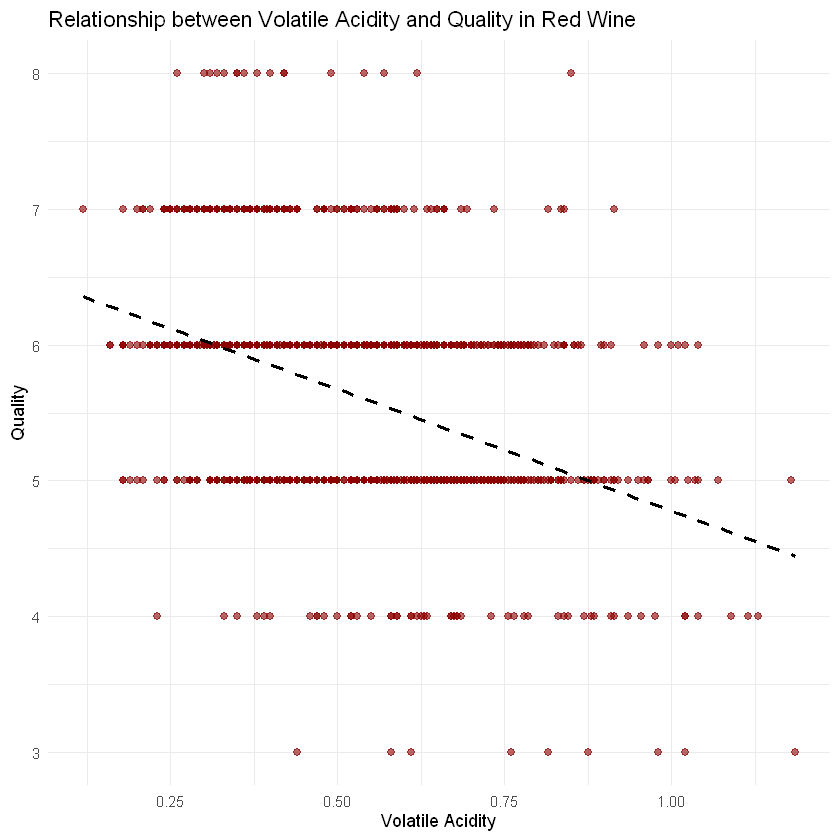

In [24]:
# Exploring the relationship between volatile acidity and wine quality
ggplot(red_wine_clean, aes(x = volatile_acidity, y = quality)) +
  geom_point(color = "darkred", alpha = 0.6, size = 2) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  labs(
    title = "Relationship between Volatile Acidity and Quality in Red Wine",
    x = "Volatile Acidity",
    y = "Quality"
  ) +
  theme_minimal()


In [25]:
# Manually inspecting outliers for volatile_acidity
out_va <- find_outliers(red_wine_clean$volatile_acidity)
summary(out_va)
print(out_va)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.020   1.022   1.040   1.069   1.103   1.185 

 [1] 1.130 1.020 1.070 1.040 1.090 1.040 1.185 1.020 1.035 1.025 1.115 1.020
[13] 1.020 1.180 1.040


In [26]:
# Quantifying the relationship between volatile acidity and quality using Pearson correlation
cor(red_wine_clean$volatile_acidity, red_wine_clean$quality, use = "complete.obs", method = "pearson")


[1] -0.3858829

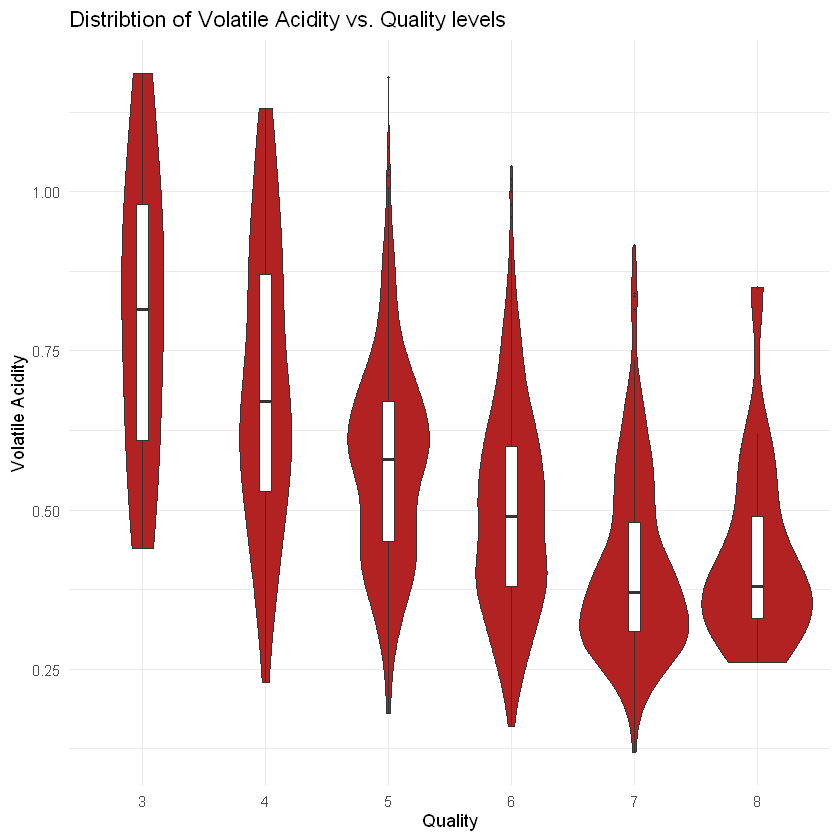

In [27]:
# Box/Violin plot to explore the relationship between volatile acidity and quality
ggplot(red_wine_clean, aes(x = factor(quality), y = volatile_acidity)) +
  geom_violin(fill = "firebrick") +
  geom_boxplot(width = 0.1, outlier.size = 0.5) +  # per aggiungere anche un boxplot all'interno
  labs(
    title = "Distribtion of Volatile Acidity vs. Quality levels",
    x = "Quality",
    y = "Volatile Acidity"
  ) +
  theme_minimal()

In [28]:
# Adding variables funtion to the decision table
add_outlier_decision <- function(wine_type, variable, num_outliers, reason, decision) {
  new_entry <- data.frame(
    wine_type = wine_type,
    variable = variable,
    num_outliers = num_outliers,
    reason = reason,
    decision = decision,
    stringsAsFactors = FALSE
  )
  
# Adding the decision
  assign("outlier_decisions", rbind(outlier_decisions, new_entry), envir = .GlobalEnv)
}


In [29]:
# Trying the funcion
add_outlier_decision("red", "volatile_acidity", length(find_outliers(red_wine_clean$volatile_acidity)),
                    "Legal thresholds were enforced during preprocessing. No further filtering was required.", "KEEP")

# View the table
print(outlier_decisions)


  wine_type         variable num_outliers
1       red    fixed_acidity           40
2       red volatile_acidity           15
                                                                                   reason
1 Legal thresholds were enforced during preprocessing. No further filtering was required.
2 Legal thresholds were enforced during preprocessing. No further filtering was required.
  decision
1     KEEP
2     KEEP


## 2.3 Citric acid


**Definition**  
Citric acid is a natural component of grapes and contributes to a wine’s freshness, balance, and flavor complexity. It may also influence microbial stability in small concentrations.

**Summary Statistics**  
Values range from 0.00 to 1.00 g/L, with a median of 0.32 and mean of 0.33. The distribution is symmetric and well-contained within chemically plausible values for dry white wines.

**Visual Inspection** 
The following plots show the relationship between Citric Acid, pH and Quality in Red Wine.

**Decision**  
All values are chemically consistent with expected fermentation profiles in Vinho Verde wines.
KEEP

---


<details>
<summary> Additional Notes</summary>
    
Citric acid is most commonly used as an acid supplement during the fermentation process to help winemakers boost the acidity of their wine especially grapes grown in warmer climates. Within the EU citric acid can only be used for stabilisation purposes and final citric acid content should not exceed 1g/L.
</details>

`geom_smooth()` using formula = 'y ~ x'


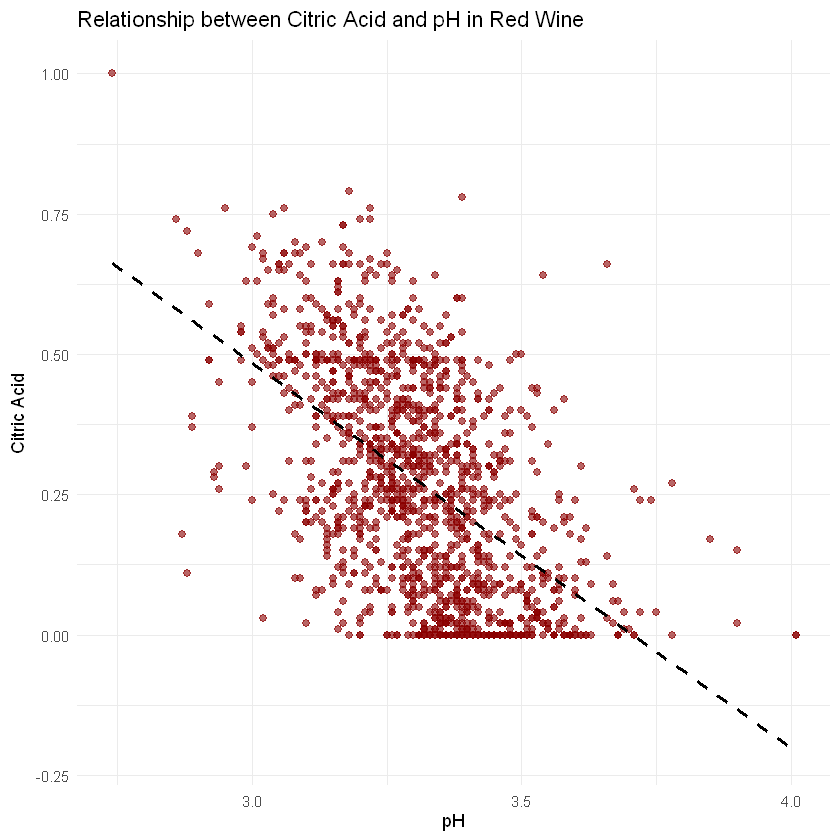

In [30]:
# Relationship betwwn pH and citric acid
ggplot(red_wine_clean, aes(x = pH, y = citric_acid)) +
  geom_point(color = "darkred", alpha = 0.6, size = 2) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  labs(
    title = "Relationship between Citric Acid and pH in Red Wine",
    x = "pH",
    y = "Citric Acid",
  ) +
  theme_minimal()

In [31]:
# Correlation coefficient between two numeric variables
cor(red_wine_clean$pH, red_wine_clean$citric_acid, use = "complete.obs", method = "pearson")


[1] -0.5442712

As expected, correlation coefficient value shows a moderate negative correlation betwwn pH and citric acid.

In [32]:
# Manually inspecting outliers for citric_acid
out_va <- find_outliers(red_wine_clean$citric_acid)
summary(out_va)
print(out_va)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

[1] 1


In [33]:
# Correlation coefficient between quality and citric acid
cor(red_wine_clean$citric_acid, red_wine_clean$quality, use = "complete.obs", method = "pearson")


[1] 0.2241125

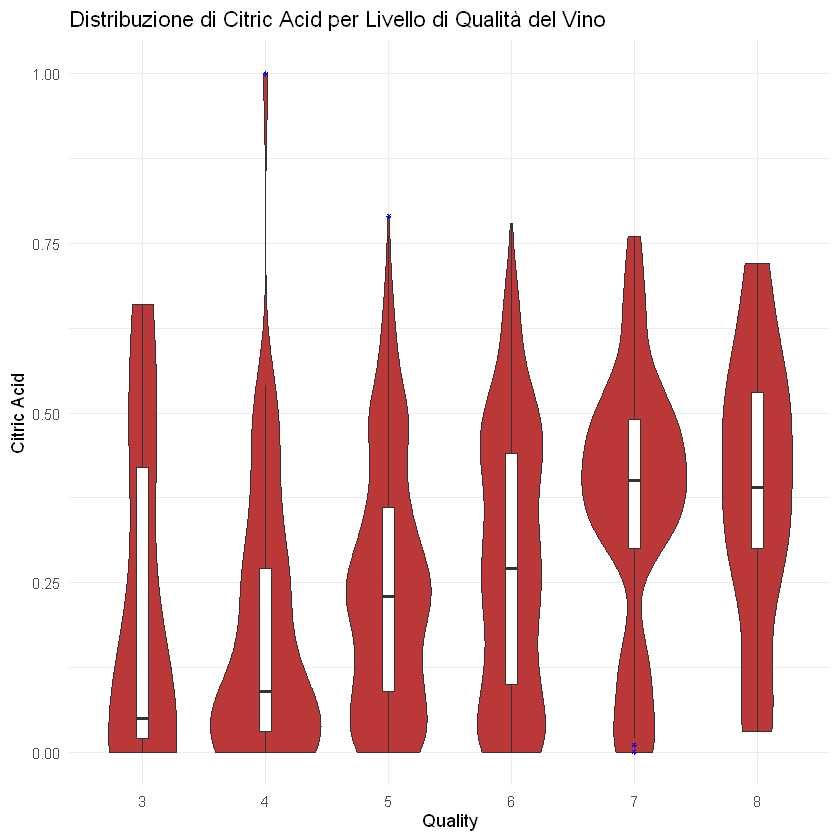

In [34]:
# The violin plot easily demostrates that total acidity is often associated with the freshness of wine.
ggplot(red_wine_clean, aes(x = factor(quality), y = citric_acid)) +
  geom_violin(fill = "firebrick", alpha = 0.9) +
  geom_boxplot(width = 0.1, outlier.size = 0.5, outlier.colour = "blue", outlier.shape = 8) +
  labs(
    title = "Distribuzione di Citric Acid per Livello di Qualità del Vino",
    x = "Quality",
    y = "Citric Acid"
  ) +
  theme_minimal()


In [35]:
# Formula for adding variables to the changing list
add_outlier_decision("red", "citric_acid", length(find_outliers(red_wine_clean$citric_acid)),
                    "Legal thresholds were enforced during preprocessing. No further filtering was required.", "KEEP")


## 2.4 Residual Sugar


**Definition**  
Residual sugar (RS) refers to the natural grape sugars remaining in wine after fermentation. RS levels directly influence the wine’s perceived sweetness, and vary considerably depending on style and winemaking intent. There are no legal limits for residual sugar in dry wines.

**Summary Statistics**  
Values in the red wine dataset range from 3.7 to 15.5 g/L, with a median of 5.1 and a mean of 5.68. Most values fall within the 1–10 g/L range, classifying the wines as "dry" according to the general wine dryness scale. A small number of observations exceed 10 g/L.

**Visual Inspection**  
The next plot shows the distribution of residual sugar in our dataset.

**Decision**  
No regulatory threshold is exceeded, and outliers above 10 g/L are consistent with known stylistic exceptions within the Vinho Verde classification.  
KEEP

---

<details>
<summary> Additional Notes</summary>
    
- According to the wine dryness scale:
  - Dry wines range from 1–10 g/L RS,
  - Off-dry wines range from 10–35 g/L,
  - Sweet wines exceed 35 g/L.
- Vinho Verde reds are generally considered dry, with typical RS levels between 4–6 g/L. The dataset confirms this with a mean of 5.8 g/L.
- However, examples such as António Lopes Vinho Tinto (Vidigal Wines) report RS levels of ~13.9 g/L, falling into the off-dry category.
- Observations with higher RS also show corresponding density and alcohol values consistent with fermentation dynamics, further supporting their plausibility.

</details>


In [36]:
# Manually inspecting outilers of residual sugar
out_va <- find_outliers(red_wine_clean$residual_sugar)
summary(out_va)
print(out_va)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.700   4.100   5.100   5.679   6.200  15.500 

  [1]  6.10  3.80  3.90  4.40 10.70  5.50  5.90  3.80  5.10  4.65  5.50  5.50
 [13]  7.30  7.20  3.80  5.60  4.00  4.00  4.00  7.00  6.40  5.60 11.00  4.50
 [25]  4.80  5.80  3.80  4.40  6.20  4.20  7.90  3.70  4.50  6.70  6.60  3.70
 [37]  5.20 15.50  4.10  8.30  6.55  4.60  4.30  5.80  5.15  6.30  4.20  4.60
 [49]  4.20  4.30  7.90  4.60  5.10  5.60  6.00  8.60  4.40  4.25  6.00  3.90
 [61]  4.20  4.00  4.00  6.60  6.00  3.80  9.00  4.60  8.80  5.00  3.80  4.10
 [73]  5.90  4.10  6.20  8.90  4.00  3.90  8.10  6.40  4.70  5.50  4.30  5.50
 [85]  3.70  6.20  5.60  7.80  4.60  5.80  4.10 12.90  4.30  4.80  6.30  4.50
 [97]  4.30  3.90  3.80  5.40  3.80  6.10  3.90  5.10  3.90 15.40  4.80  5.20
[109]  5.20  3.75 13.80  5.70  4.30  4.10  4.10  4.40  3.70  6.70 13.90  5.10
[121]  7.80


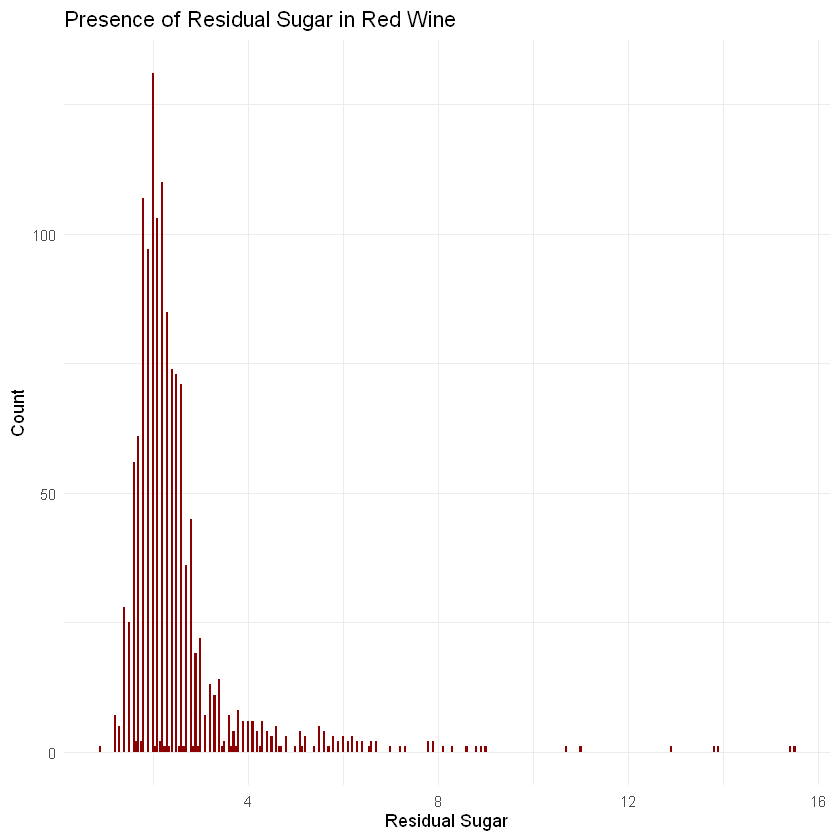

In [37]:
# Visualazing residual sugar in white wine
ggplot(red_wine_clean, aes(x = residual_sugar)) +
  geom_bar(fill = "darkred") +
  labs(
    title = "Presence of Residual Sugar in Red Wine",
    x = "Residual Sugar",
    y = "Count"
  ) +
  theme_minimal()

              

In [38]:
# Manually inspecting outliers for residual sugar
out_va <- find_outliers(red_wine_clean$residual_sugar)
summary(out_va)
print(out_va)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.700   4.100   5.100   5.679   6.200  15.500 

  [1]  6.10  3.80  3.90  4.40 10.70  5.50  5.90  3.80  5.10  4.65  5.50  5.50
 [13]  7.30  7.20  3.80  5.60  4.00  4.00  4.00  7.00  6.40  5.60 11.00  4.50
 [25]  4.80  5.80  3.80  4.40  6.20  4.20  7.90  3.70  4.50  6.70  6.60  3.70
 [37]  5.20 15.50  4.10  8.30  6.55  4.60  4.30  5.80  5.15  6.30  4.20  4.60
 [49]  4.20  4.30  7.90  4.60  5.10  5.60  6.00  8.60  4.40  4.25  6.00  3.90
 [61]  4.20  4.00  4.00  6.60  6.00  3.80  9.00  4.60  8.80  5.00  3.80  4.10
 [73]  5.90  4.10  6.20  8.90  4.00  3.90  8.10  6.40  4.70  5.50  4.30  5.50
 [85]  3.70  6.20  5.60  7.80  4.60  5.80  4.10 12.90  4.30  4.80  6.30  4.50
 [97]  4.30  3.90  3.80  5.40  3.80  6.10  3.90  5.10  3.90 15.40  4.80  5.20
[109]  5.20  3.75 13.80  5.70  4.30  4.10  4.10  4.40  3.70  6.70 13.90  5.10
[121]  7.80


`geom_smooth()` using formula = 'y ~ x'


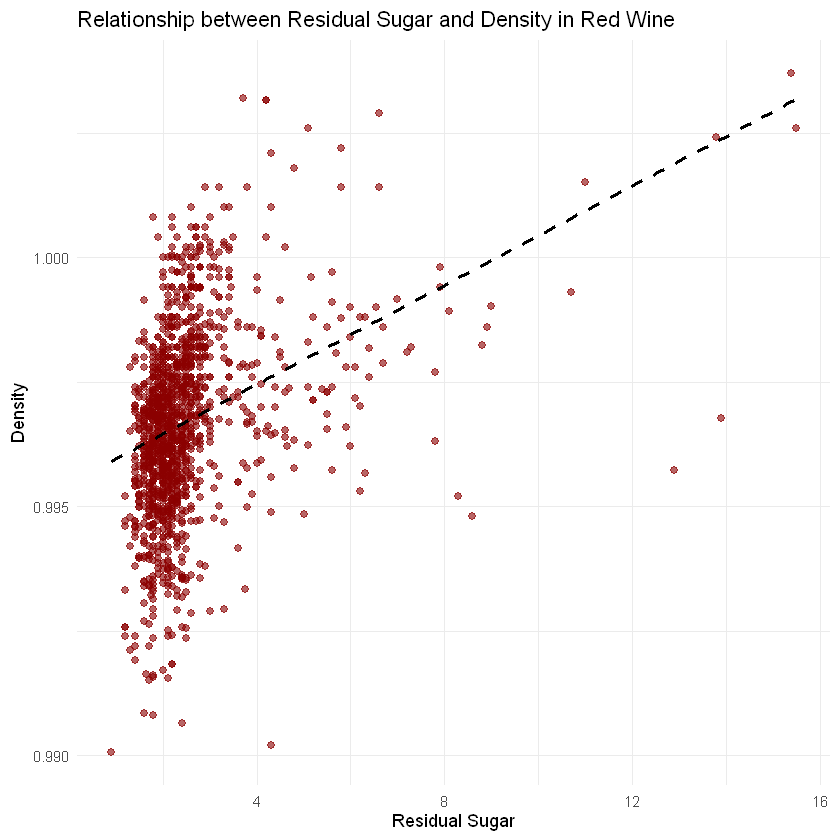

In [39]:
# Showing the number of outliers per numeric variable (red wine)
ggplot(red_wine_clean, aes(x = residual_sugar, y = density)) +
  geom_point(color = "darkred", alpha = 0.6, size = 2) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  labs(
    title = "Relationship between Residual Sugar and Density in Red Wine",
    x = "Residual Sugar",
    y = "Density",
  ) +
  theme_minimal()

In [40]:
# Manually inspecting outliers for residual sugar
out_va <- find_outliers(red_wine$residual_sugar)
summary(out_va)
print(out_va)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.7     4.2     5.1     5.8     6.3    15.5 

  [1]  6.10  3.80  3.90  4.40 10.70  5.50  5.90  3.80  5.10  4.65  5.50  5.50
 [13]  7.30  7.20  3.80  5.60  4.00  4.00  4.00  7.00  6.40  5.60 11.00  4.50
 [25]  4.80  5.80  3.80  4.40  6.20  4.20  7.90  3.70  4.50  6.70  6.60  3.70
 [37]  5.20 15.50  4.10  8.30  6.55  4.60  6.10  4.30  5.80  5.15  6.30  4.20
 [49]  4.60  4.20  4.30  7.90  4.60  5.10  5.60  6.00  8.60  7.50  4.40  4.25
 [61]  6.00  3.90  4.20  4.00  4.00  6.60  6.00  3.80  9.00  4.60  8.80  5.00
 [73]  3.80  4.10  5.90  4.10  6.20  8.90  4.00  3.90  8.10  6.40  8.30  8.30
 [85]  4.70  5.50  4.30  5.50  3.70  6.20  5.60  7.80  4.60  5.80  4.10 12.90
 [97]  4.30 13.40  4.80  6.30  4.50  4.30  3.90  3.80  5.40  3.80  6.10  3.90
[109]  5.10  3.90 15.40  4.80  5.20  5.20  3.75 13.80  5.70  4.30  4.10  4.10
[121]  4.40  3.70  6.70 13.90  5.10  7.80


In [41]:
# Add outlier to the decision table
add_outlier_decision("red", "residual_sugar", length(find_outliers(red_wine_clean$residual_sugar)),
                    "Plausible values.", "KEEP")


## 2.5 Chlorides

**Definition**  
Chlorides in wine primarily refer to the concentration of chloride ions (Cl⁻), which contribute to salinity and can influence taste, microbial stability, and chemical reactivity. Chloride levels in wine are mainly determined by environmental factors and winemaking practices.

**Summary Statistics**  
Chloride values range from 0.012 to 0.611 g/L, with a median of 0.1695 and a mean of 0.2097. All observations fall well below the legal limit of 2.0 g/L.

**Visual Inspection**  
Next visual shows the presence of chlorides in our vinho verde's red wines.

**Decision**  
All chloride values are within legal and chemically plausible ranges. No removal necessary.  
**Decision**: KEEP

---

<details>
<summary> Additional Notes</summary>
    
- Several environmental and viticultural factors influence chloride content:
  - **Terroir**: Geography, geology, and climate affect absorption.
  - **Irrigation**: Saline water can elevate Cl⁻ concentration in grapes.
  - **Soil**: Granitic and coastal soils often lead to higher chloride uptake.
  - **Varietal sensitivity**: Grapes like Syrah may absorb more chloride.
  - **Proximity to the coast**: Coastal vineyards often yield wines with higher chloride content.
- Rías Baixas (Spain) and northern coastal Portugal show naturally elevated levels, but values remain far below critical thresholds.

</details>



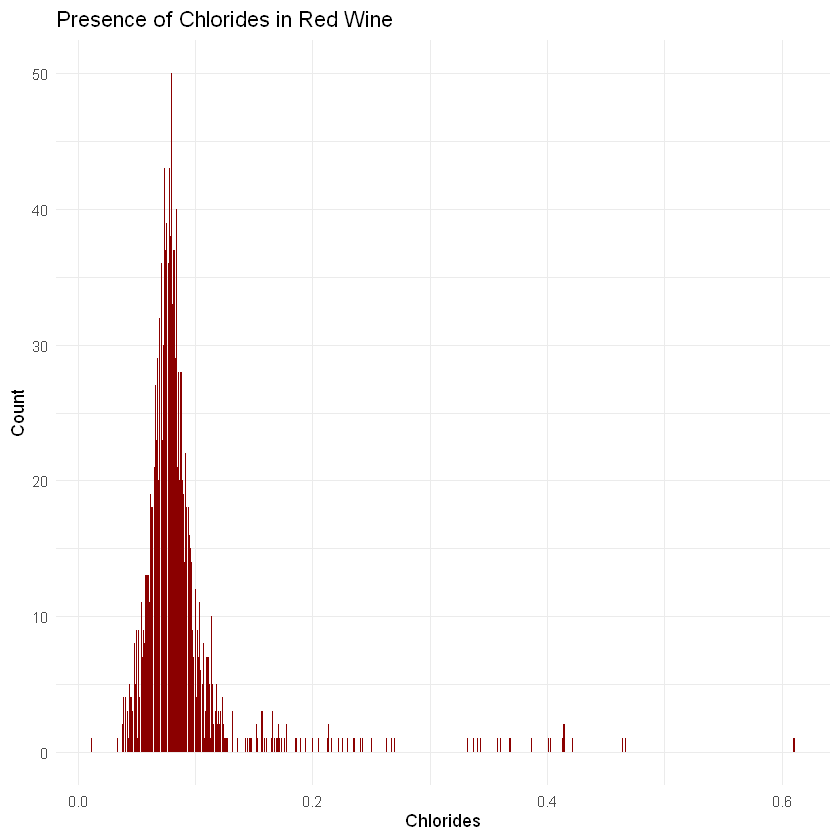

In [42]:
# Bar chart for presence of chlorides
ggplot(red_wine_clean, aes(x = chlorides)) +
  geom_bar(fill = "darkred") +
  labs(
    title = "Presence of Chlorides in Red Wine",
    x = "Chlorides",
    y = "Count"
  ) +
  theme_minimal()


In [43]:
# Manually inspecting outliers for chlorides
out_va <- find_outliers(red_wine_clean$chlorides)
summary(out_va)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0120  0.1273  0.1695  0.2097  0.2482  0.6110 

In [44]:
# Add outlier to the decision table
add_outlier_decision("red","chlorides", length(find_outliers(red_wine_clean$chlorides)),
                    "Legal thresholds were enforced during preprocessing. No further filtering was required.", "KEEP")


## 2.6 Free Sulfur Dioxide


**Definition**  
Free sulfur dioxide (FSO₂) plays a key role in protecting wine from oxidation and microbial spoilage during production and aging. Its antimicrobial activity is strongly pH-dependent, being more effective at lower pH levels.

**Summary Statistics**  
Values range from 43.00 to 68.00 mg/L, with a median of 50.00 and a mean of 50.52. All observations fall well below the regulatory threshold of 160 mg/L set for Vinho Verde wines.

**Visual Inspection**  
The violin + boxplot clearly shows the distribution of free sulfur dioxide in red wine.
**Decision**  
The dataset was pre-filtered to comply with legal limits. All remaining values are chemically plausible and fall within expected enological ranges.  
KEEP

---

<details>
<summary> Additional Notes</summary>

- Excessive FSO₂ can mute fruit aromas and contribute to undesirable sensory attributes such as metallic, bitter, or chemical notes.
- Wines containing more than 10 mg/L of total sulfur dioxide are required under EU regulations to display “contains sulphites” on the label.
- The effectiveness of FSO₂ is influenced by pH: at lower pH levels, a greater proportion exists in the active molecular form.
- No outliers were flagged in this dataset after legal thresholds were applied during preprocessing.

</details>



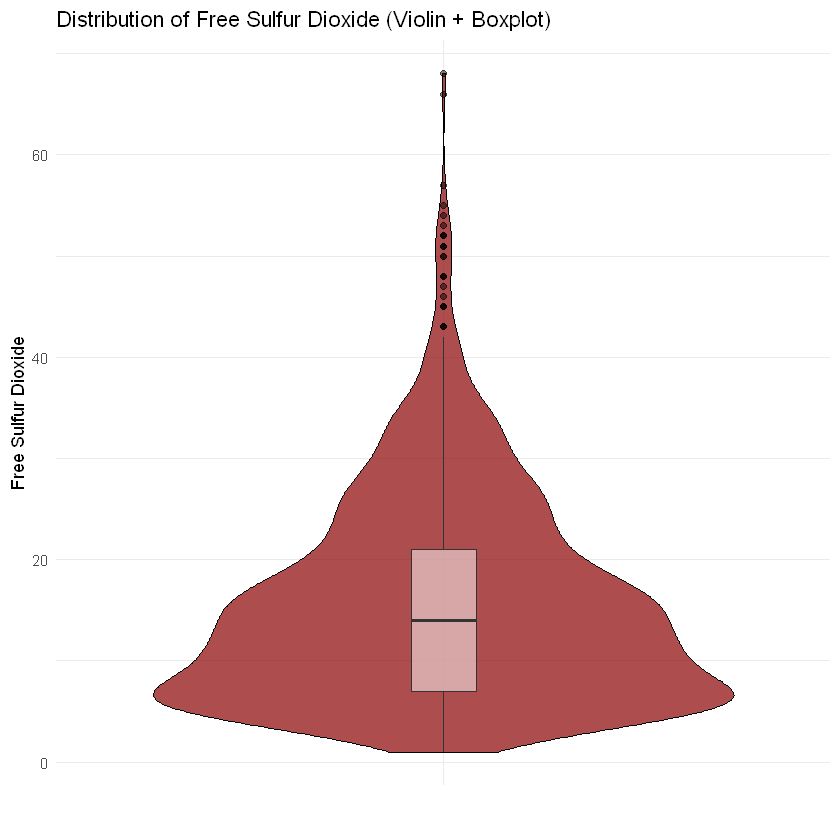

In [45]:
# Violin with boxplot for free sulfur dioxide
ggplot(red_wine_clean, aes(x = "", y = free_sulfur_dioxide)) +
  geom_violin(fill = "darkred", color = "black", alpha = 0.7) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.5) +
  labs(
    title = "Distribution of Free Sulfur Dioxide (Violin + Boxplot)",
    x = "",
    y = "Free Sulfur Dioxide"
  ) +
  theme_minimal()


In [46]:
# Manually inspecting outliers for free sulfur dioxide
out_va <- find_outliers(red_wine_clean$free_sulfur_dioxide)
summary(out_va)
print(out_va)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  43.00   46.00   50.00   50.52   52.00   68.00 

 [1] 52 51 50 68 43 47 54 46 45 53 52 51 45 57 50 45 48 43 48 43 51 52 55 48 66


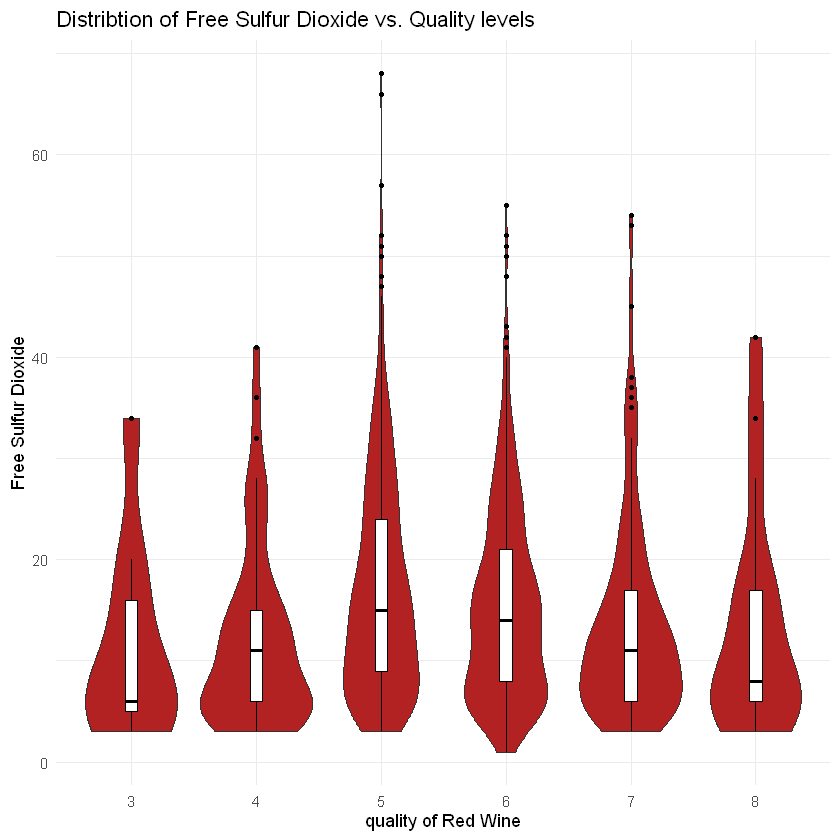

In [47]:
# Violin/ boxplot for the relationship between quality and free sulfur dioxide
ggplot(red_wine_clean, aes(x = factor(quality), y = free_sulfur_dioxide)) +
  geom_violin(fill = "firebrick") +
  geom_boxplot(width = 0.1, outlier.size = 1.2, color = 'black') +  # per aggiungere anche un boxplot all'interno
  labs(
    title = "Distribtion of Free Sulfur Dioxide vs. Quality levels",
    x = "quality of Red Wine",
    y = "Free Sulfur Dioxide"
  ) +
  theme_minimal()


In [48]:
# add outlier to the decision table
add_outlier_decision("red", "free_sulfur_dioxide", length(find_outliers(red_wine_clean$free_sulfur_dioxide)),
                    "Legal thresholds were enforced during preprocessing. No further filtering was required.", "KEEP")


## 2.7 Total Sulfur Dioxide

**Definition**  
Total sulfur dioxide (SO₂) includes both free and bound forms of sulfur dioxide. It serves as a preservative and antioxidant in wine, but high concentrations can result in off-flavors and pose regulatory concerns.

**Summary Statistics**  
Values in the red wine dataset range from 124.0 to 149.0 mg/L, with a median of 135.5 and a mean of 136.7. All values remain under the legal threshold of 150 mg/L for red wines, as defined by the International Code of Oenological Practices.

**Visual Inspection**  
The next boxplot is perfect to show the distribution and outliers of total sulfur dioxide in our dataset.

**Decision**  
Outliers exceeding the legal limit of 150 mg/L were removed during preprocessing. The current dataset contains only compliant and chemically plausible values.  
KEEP

---

<details>
<summary> Additional Notes</summary>

- The OIV (2015/01) defines the following legal limits for total SO₂:
  - Red wines: max 150 mg/L  
  - White wines: max 200 mg/L  
  - Sweet wines: max 400 mg/L
- Regulatory filtering was applied before analysis to ensure legal compliance.
- Total SO₂ levels are a common concern in export markets and are tightly controlled in EU legislation.

</details>



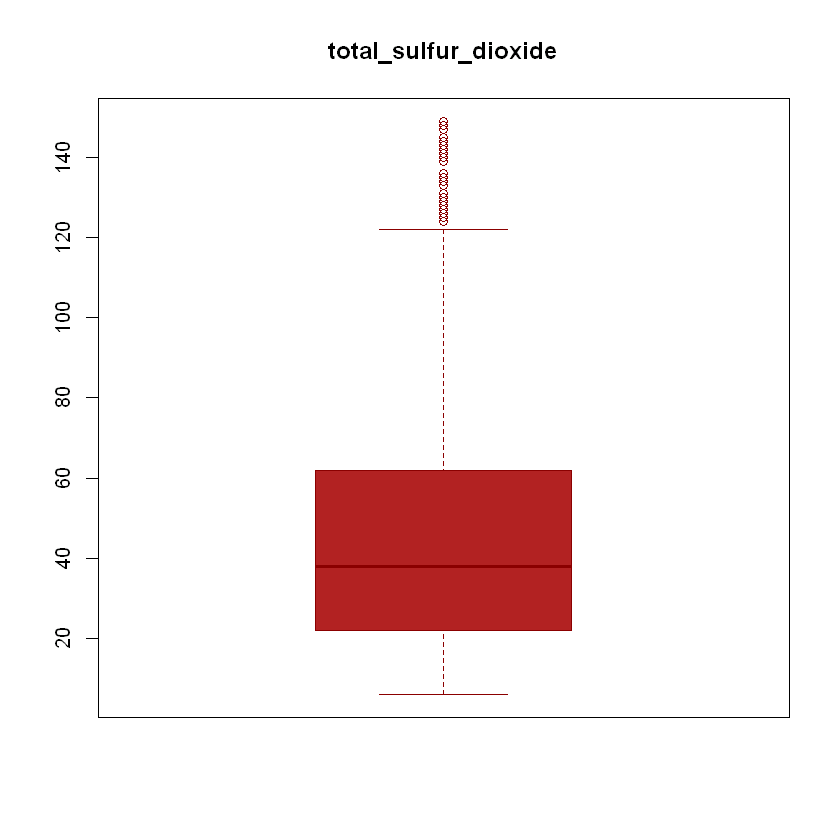

In [49]:
# distribution of total sulfur dioxide
boxplot(red_wine_clean$total_sulfur_dioxide, main = "total_sulfur_dioxide", col = "firebrick", border = "darkred")


In [50]:
# Manually inspecting outliers for total sulfur dioxide
out_va <- find_outliers(red_wine_clean$total_sulfur_dioxide)
summary(out_va)
print(out_va)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  124.0   129.2   135.5   136.7   144.0   149.0 

 [1] 145 148 136 125 140 133 134 141 129 128 143 144 127 126 145 144 135 124 134
[20] 124 129 133 142 149 147 145 148 125 127 139 143 144 130 135 141 133 147 131


In [51]:
# Update the decision table
add_outlier_decision("red", "total_sulfur_dioxide", length(find_outliers(red_wine_clean$total_sulfur_dioxide)),
                    "Legal thresholds were enforced during preprocessing. No further filtering was required.", "KEEP")


## 2.8 Density

**Definition**  
Density is the mass of a wine per unit volume, expressed in g/cm³. It is influenced by the concentration of dissolved substances, particularly sugars and alcohol, and is often used to monitor fermentation progress.

**Summary Statistics**  
Values in the dataset initially spanned a wide range. After filtering, all retained observations fall within 0.990 to 1.003 g/cm³, aligning with physically and chemically plausible values for dry red wines.

**Visual Inspection**
The boxplot shows density's outliers with the limits for the applied filters in our red wine dataset.

**Decision**  
Observations falling outside the 0.990–1.003 range were removed to ensure the dataset reflects standard winemaking practices.  
REMOVE outliers outside 0.990–1.003

---

<details>
<summary> Additional Notes</summary>
    
- According to Michlovský, typical wine density values range between 0.9912 and 1.0138 g/cm³. 
- Extreme density values often indicate errors, measurement inconsistencies, or non-standard winemaking conditions.
- The filter applied is stricter (0.990–1.003) to match the general profile of red Vinho Verde wines and eliminate potential anomalies.
- Density is strongly correlated with residual sugar and alcohol content, and extreme values can distort interpretation of other variables.

</details>


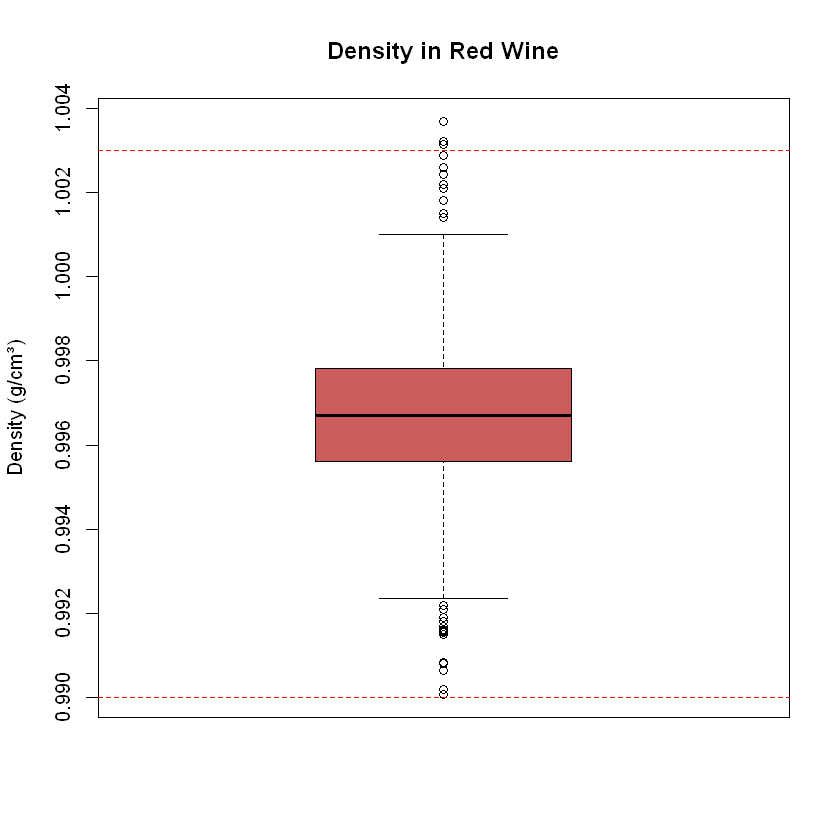

In [52]:
# Boxplot for density in red wine
boxplot(red_wine_clean$density,
        main = "Density in Red Wine",
        ylab = "Density (g/cm³)",
        col = "indianred",
        border = "black")
abline(h = 0.990, col = "red", lty = 2)
abline(h = 1.003, col = "red", lty = 2)


In [53]:
# Manually inspecting outliers for density
find_outliers(red_wine_clean$density)

[1] 0.99160 1.00140 1.00150 1.00180 1.00220 1.00140 1.00140 1.00140 1.00320
[10] 1.00260 1.00140 1.00315 1.00315 1.00210 0.99170 0.99220 1.00260 0.99210
[19] 0.99154 0.99064 1.00289 0.99162 0.99007 0.99020 0.99220 0.99150 0.99157
[28] 0.99080 0.99084 0.99191 1.00369 1.00242 0.99182 0.99182

In [54]:
# Removing density outliers
red_wine_clean <- filter_legal_range(red_wine_clean, "density", min_val = 0.990, max_val = 1.003)

In [55]:
# Updating the decision table
add_outlier_decision ("red", "density", length(find_outliers(red_wine_clean$density)),
                     "Values out of range.", "REMOVE")


## 2.9 pH


**Definition**  
pH is a measure of the acidity or basicity of a wine, reflecting the balance between free hydrogen ions and buffering compounds such as potassium. It directly influences color, microbial stability, and flavor perception.

**Summary Statistics**  
Values range from 2.74 to 4.01, with a mean of 3.31 and a median of 3.31. The typical pH range for red wines lies between 3.5 and 3.8, although stylistic and varietal differences can produce wider variation.

**Visual Inspection**  
Boxplot for pH's outlier visualization in the red wine dataset.

**Decision**  
Initial filtering excluded values outside the 3.0–4.0 range. However, after deeper review, this was deemed unnecessarily restrictive. All current values fall within the extended plausible range of 2.9 to 4.0 and are therefore retained.  
KEEP all current values

---

<details>
<summary> Additional Notes</summary>

- Common red wine pH falls between 3.5 and 3.8. Values below 3.0 are uncommon but not chemically impossible, especially in high-acid styles or early fermentation stages.
- High pH (>4.0) may compromise stability and color, but can occur naturally under specific winemaking conditions.
- Literature and winemaking sources indicate a physiological pH range of 2.9–4.0 as broadly acceptable.
- The final decision was based on contextual plausibility, not rigid cutoff points.

</details>



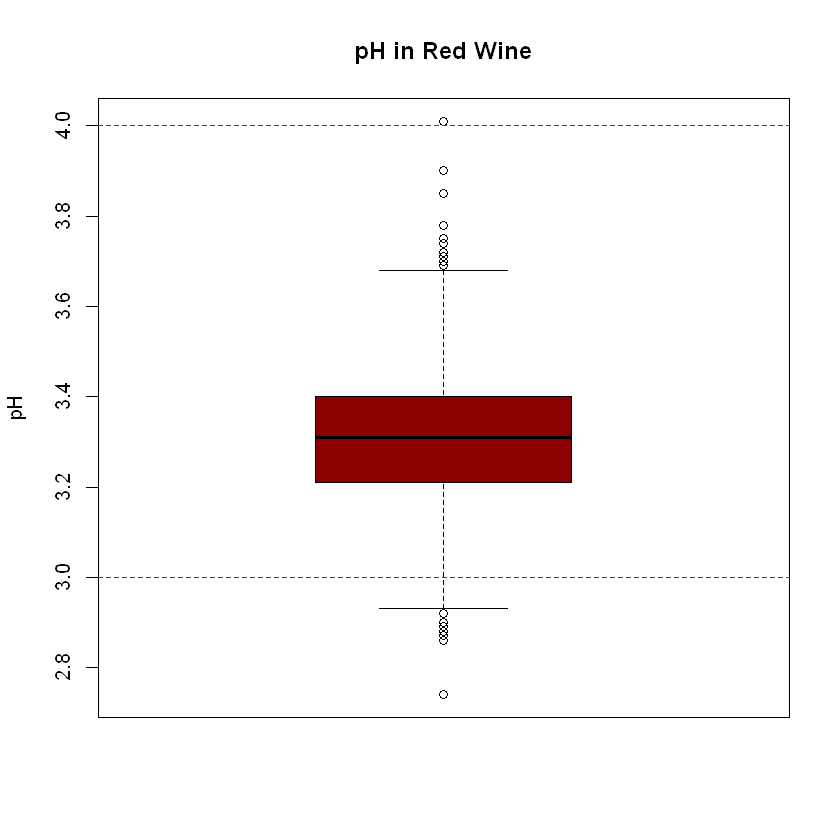

In [56]:
# Boxplot visualitazion for pH
boxplot(red_wine_clean$pH,
        main = "pH in Red Wine",
        ylab = "pH",
        col = "darkred",
        border = "black")

abline(h = 3.0, col = "red", lty = 2)
abline(h = 4.0, col = "red", lty = 2)


In [57]:
# Find outliers for pH
out_pH <- find_outliers(red_wine_clean$pH)
summary(out_pH)
print(out_pH)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.740   2.893   3.710   3.469   3.772   4.010 

 [1] 3.90 3.75 3.85 2.74 3.69 2.88 2.86 3.74 3.72 2.87 2.89 2.92 3.90 3.71 3.69
[16] 3.71 2.89 3.78 3.70 3.78 4.01 2.90 4.01 3.71 2.88 3.72


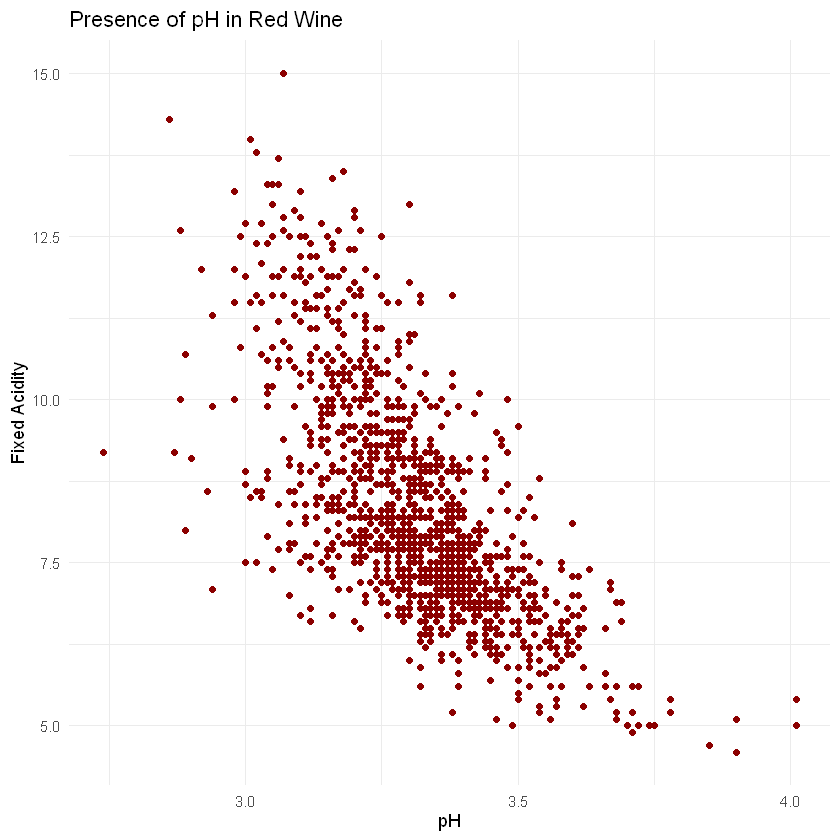

In [58]:
# Relationship between pH and fixed acidity
ggplot(red_wine_clean, aes(x = pH, y = fixed_acidity)) +
  geom_point(color = "darkred") +
  labs(
    title = "Presence of pH in Red Wine",
    x = "pH",
    y = "Fixed Acidity"
  ) +
  theme_minimal()


In [59]:
# summary for pH in red wine
summary(red_wine_clean$pH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.740   3.210   3.310   3.311   3.400   4.010 

In [60]:
# Manually inspecting outliers for pH
find_outliers(red_wine_clean$pH)

[1] 3.90 3.75 3.85 2.74 3.69 2.88 2.86 3.74 3.72 2.87 2.89 2.92 3.90 3.71 3.69
[16] 3.71 2.89 3.78 3.70 3.78 4.01 2.90 4.01 3.71 2.88 3.72

In [61]:
#updating the decision table
add_outlier_decision("red","pH", length(find_outliers(red_wine_clean$pH)),
                     "Plausable values.", "KEEP")


## 2.10 Sulphates


**Definition**  
Sulphates (primarily sulfur dioxide compounds, SO₂) are used in winemaking as preservatives to inhibit microbial growth and to stabilize wine during fermentation and aging. They occur naturally in grapes and are often added intentionally.

**Summary Statistics**  
Values range from 0.33 to 2.00 g/dm³, with a median of 0.62 and a mean of 0.659. While most values fall within typical levels for red wines (generally 0.5–0.8 g/dm³), a small number exceed 1.5.

**Visual Inspection**  
The next scatter plots shos the relationships between sulphates, alcohol and quality.

**Decision**  
No filtering was applied. Although a few high values (>1.5) were detected, these observations also showed lower alcohol levels and moderate quality ratings, suggesting they may represent valid low-alcohol blends with increased SO₂ for preservation.  
KEEP

---

<details>
<summary> Additional Notes</summary>

- Sulphates support yeast activity and microbial stability, especially in low-alcohol wines that may be more prone to spoilage.
- Observations with high sulphate levels showed alcohol < 10.5% and quality scores between 5 and 7.
- These records may reflect stylistic choices rather than errors or data anomalies.
- Legal maximums for total SO₂ (not just sulphates) were applied in the preprocessing phase.

</details>


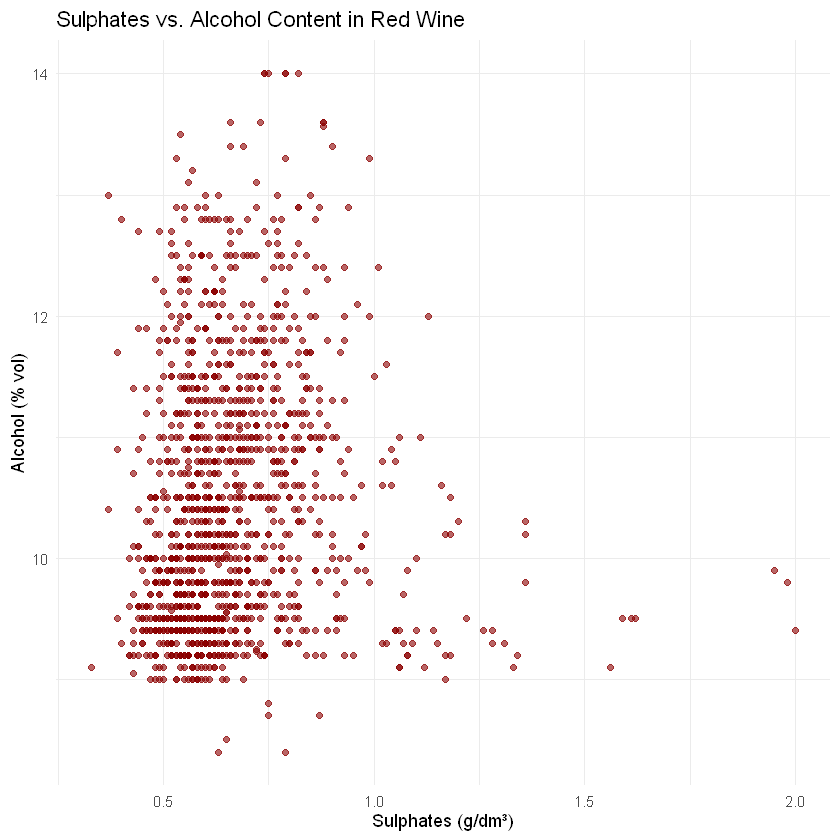

In [62]:
# Scatterplot for sulphates vs. alcohol
ggplot(red_wine_clean, aes(x = sulphates, y = alcohol)) +
  geom_point(color = "darkred", alpha = 0.6) +
  labs(
    title = "Sulphates vs. Alcohol Content in Red Wine",
    x = "Sulphates (g/dm³)",
    y = "Alcohol (% vol)"
  ) +
  theme_minimal()


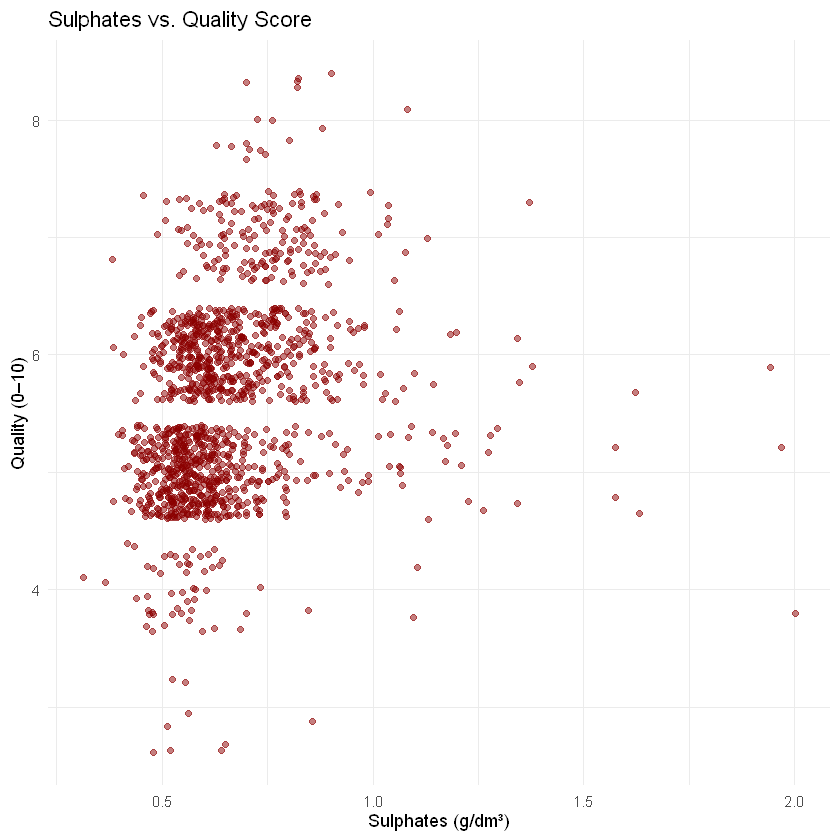

In [63]:
# Geom jitter for sulphates vs. quality makes points easier to find.
ggplot(red_wine_clean, aes(x = sulphates, y = quality)) +
  geom_jitter(color = "darkred", width = 0.02, alpha = 0.5) +
  labs(
    title = "Sulphates vs. Quality Score",
    x = "Sulphates (g/dm³)",
    y = "Quality (0–10)"
  ) +
  theme_minimal()


In [64]:
# Manually inspecting outliers for sulphates
find_outliers(red_wine_clean$sulphates)

# Sulphates summary
summary(red_wine_clean$sulphates)


[1] 1.56 1.28 1.08 1.20 1.12 1.28 1.14 1.95 1.22 1.98 1.31 2.00 1.08 1.59 1.02
[16] 1.03 1.61 1.09 1.26 1.08 1.00 1.36 1.18 1.13 1.04 1.11 1.07 1.06 1.06 1.05
[31] 1.06 1.04 1.05 1.02 1.02 1.36 1.36 1.05 1.17 1.62 1.06 1.18 1.07 1.34 1.16
[46] 1.10 1.15 1.17 1.33 1.18 1.17 1.03 1.10 1.01

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.330   0.550   0.620   0.659   0.730   2.000 

In [65]:
# Updating the decision table
add_outlier_decision("red", "sulphates", length(find_outliers(red_wine_clean$sulphates)),
                     "Legal thresholds were enforced during preprocessing. No further filtering was required.", "KEEP")


## 2.11 Alcohol


**Definition**  
Alcohol content in wine, expressed as % alcohol by volume (ABV), results from the fermentation of sugars by yeast. It influences mouthfeel, stability, perception of sweetness, and is a critical parameter in wine classification and taxation.

**Summary Statistics**  
Values range from 8.4% to 14.0% ABV, with a median of 10.15 and a mean of 10.43. Most wines fall between 9% and 12%, reflecting typical alcohol levels for red Vinho Verde wines.

**Visual Inspection**  
A histogram with a clear distribution of alcohol content in our dataset.

**Decision**  
Legal limits (7.0–14.5% ABV) were enforced during preprocessing. The current distribution is smooth, continuous, and chemically plausible, with no anomalies near the limits.  
KEEP

---

<details>
<summary> Additional Notes</summary>

- EU regulations define minimum and maximum ABV thresholds depending on wine-growing zones.
- Outlier values (13.6–14.0%) were observed but fall within the acceptable legal and stylistic range for fortified or sun-exposed wines.
- The alcohol distribution is unimodal and well-behaved, requiring no further filtering.

</details>


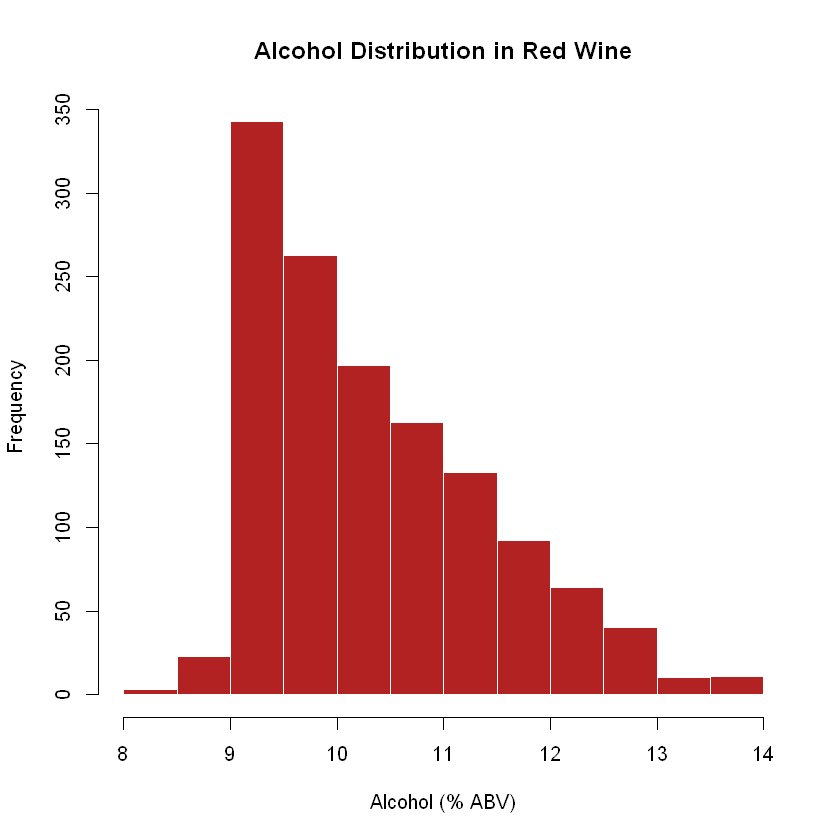

In [66]:
# Histogram for alcholo distributin
hist(red_wine_clean$alcohol,
     main = "Alcohol Distribution in Red Wine",
     xlab = "Alcohol (% ABV)",
     col = "firebrick",
     border = "white")

abline(v = 7.0, col = "red", lty = 2)
abline(v = 14.5, col = "red", lty = 2)



In [67]:
# Manually inspecting outliers for alcohol
find_outliers(red_wine_clean$alcohol)

# Summary for alcohol in red wine
summary(red_wine_clean$alcohol)


[1] 14.00000 14.00000 14.00000 14.00000 13.60000 13.60000 13.60000 14.00000
 [9] 14.00000 13.56667 13.60000

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.40    9.50   10.15   10.43   11.10   14.00 

In [68]:
# Decision table emtry
add_outlier_decision("red", "alcohol", length(find_outliers(red_wine_clean$alcohol)),
                     "Plausable Values.", "KEEP")


## 2.12 Quality


**Definition**  
Quality in wine is a composite measure reflecting sensory, structural, and stylistic elements. While subjective, it is commonly evaluated based on indicators such as complexity, balance, typicity, and finish.

**Summary Statistics**  
The quality scores in this dataset range from 3 to 8, with a median of 6 and a mean of 5.63. Most values cluster between 5 and 6. No extreme or implausible ratings are present, and the distribution appears unimodal.

**Visual Inspection**  
Violin + boxplot showing the distribution of quality scores.

**Decision**  
No outliers were removed from the quality variable. The full range of values appears plausible and useful for evaluating trends and modeling wine performance.  
KEEP

---

<details>
<summary> Additional Notes</summary>
    
**Four Indicators of Wine Quality**

1. **Complexity**  
   Higher quality wines tend to exhibit multiple flavor layers that evolve over time. Lower quality wines may present only one or two dominant notes with limited persistence.

2. **Balance**  
   Quality wines demonstrate harmony among acidity, tannins, sweetness, alcohol, and fruit. Even when one component is dominant, overall equilibrium is essential.

3. **Typicity**  
   This refers to how well a wine reflects the characteristics of its grape variety and region. In Vinho Verde reds, varietals like Alvarelhão and Espadeiro offer elegance and acidity, while Vinhão is bold and rustic, showing deep color and structure.

4. **Intensity and Finish**  
   Intensity refers to flavor concentration, and finish to how long those flavors linger after swallowing. Wines with longer, structured finishes are generally considered higher in quality.

</details>

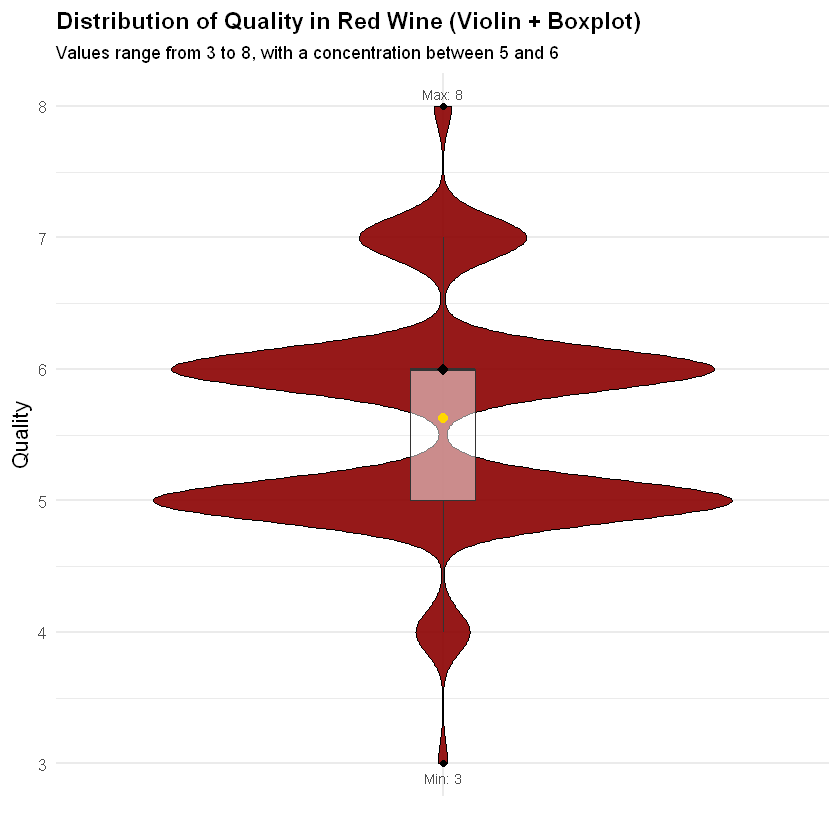

In [69]:
# Violin + Boxolot for distribution of Quality in red wine
ggplot(red_wine_clean, aes(x = "", y = quality)) +
  geom_violin(fill = "darkred", color = "black", alpha = 0.9) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.5) +
  
  # Media e mediana
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold", fill = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +

  # Annotazioni corrette con annotate()
  annotate("text", x = 1, y = min(red_wine_clean$quality), label = paste("Min:", min(red_wine_clean$quality)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(red_wine_clean$quality), label = paste("Max:", max(red_wine_clean$quality)), 
           vjust = -0.6, color = "gray30", size = 3) +

  # Titolo e stile
  labs(
    title = "Distribution of Quality in Red Wine (Violin + Boxplot)",
    subtitle = "Values range from 3 to 8, with a concentration between 5 and 6",
    x = "",
    y = "Quality"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )



In [70]:
# Manually inspecting outliers for quality
find_outliers(red_wine_clean$quality)

summary(red_wine_clean$quality)

[1] 8 8 8 8 8 3 8 8 3 8 3 8 3 3 8 8 8 8 8 3 8 8 3 3 3 8

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.626   6.000   8.000 

In [71]:
# Last entry for Red Wine decision table
add_outlier_decision("red", "quality", length(find_outliers(red_wine_clean$alcohol)),
                     "Subjective aggregate assessment.", "KEEP")

## 2.13 Decision Table

To support transparency and reproducibility, all decisions related to outlier management and variable filtering were documented systematically in the table below. Each entry includes:

- the variable examined  
- the number of outliers detected (via IQR or domain-based rules)  
- the rationale behind the decision (chemical plausibility, regulation, or stylistic exception)  
- the final action taken (KEEP or REMOVE)

This table reflects a data-cleaning approach that is not merely rule-based, but context-aware—grounded in domain knowledge from oenology and wine chemistry.

> **Note:**  
> The table does **not include values that were removed a priori based on legal thresholds** (e.g., total sulfur dioxide, alcohol content). Those filters were enforced during the preprocessing phase to ensure regulatory compliance before outlier exploration.

In [72]:
# View the decision table
print(outlier_decisions)

   wine_type             variable num_outliers
1        red        fixed_acidity           40
2        red     volatile_acidity           15
3        red          citric_acid            1
4        red       residual_sugar          121
5        red            chlorides           98
6        red  free_sulfur_dioxide           25
7        red total_sulfur_dioxide           38
8        red              density           30
9        red                   pH           26
10       red            sulphates           54
11       red              alcohol           11
12       red              quality           11
                                                                                    reason
1  Legal thresholds were enforced during preprocessing. No further filtering was required.
2  Legal thresholds were enforced during preprocessing. No further filtering was required.
3  Legal thresholds were enforced during preprocessing. No further filtering was required.
4                        

## 2.14 Conclusion

The red wine dataset has been preprocessed and cleaned using a hybrid approach: regulatory filters were applied upfront (e.g., alcohol, SO₂, density), while variable-specific outlier management was guided by statistical exploration and enological reasoning.

No values were removed arbitrarily. Decisions were based on plausibility, stylistic context, or documented thresholds. This ensures data integrity while maintaining natural variance in wine composition.

The resulting dataset is clean, regulation-compliant, and analytically robust — ready for further modeling or comparative analysis with white wine samples.


# 3 White Wine Analysis

This section mirrors the structure applied to red wine data, focusing on the physicochemical variables in white Vinho Verde wines.  
As with the red wine dataset, legal limits were enforced during preprocessing.  
All remaining observations were explored individually, using visual inspection, chemical reasoning, and domain-specific references to guide the cleaning process.

The goal is to ensure the dataset is both scientifically reliable and representative of plausible winemaking conditions before any modeling or interpretation.

**Legal Thresholds Applied in Preprocessing**

The following legal limits were applied to the white wine dataset during the initial data cleaning phase to ensure compliance with EU/local wine production standards:

- **Fixed acidity** : min 4.5
- **Volatile acidity**: max 1.2
- **Citric acid**: max 1.0
- **Chlorides**: max 1.0
- **Free SO₂**: max 160 mg/L  
- **Total SO₂**:  
   - White: max 200 mg/L 
   - Sweet: max 400 mg/L
- **Sulphates**: max 2.0
- **Alcohol**: 7.0%–14.5% ABV  


In [73]:
# Control check for legal values in white wine
check_range <- function(df, var, min_val = NULL, max_val = NULL) {
  cat("\n", var, "\n")
  if (!is.null(min_val)) cat("  Min check (", var, "): ", min(df[[var]]) >= min_val, "\n")
  if (!is.null(max_val)) cat("  Max check (", var, "): ", max(df[[var]]) <= max_val, "\n")
}

# Controlli
check_range(white_wine_clean, "fixed_acidity", min_val = 4.5)
check_range(white_wine_clean, "volatile_acidity", max_val = 1.2)
check_range(white_wine_clean, "citric_acid", max_val = 1.0)
check_range(white_wine_clean, "chlorides", max_val = 1.0)
check_range(white_wine_clean, "free_sulfur_dioxide", max_val = 160)
check_range(white_wine_clean, "total_sulfur_dioxide", max_val = 400)
check_range(white_wine_clean, "sulphates", max_val = 2.0)
check_range(white_wine_clean, "alcohol", min_val = 7.0, max_val = 14.5)



 fixed_acidity 
  Min check ( fixed_acidity ):  TRUE 

 volatile_acidity 
  Max check ( volatile_acidity ):  TRUE 

 citric_acid 
  Max check ( citric_acid ):  TRUE 

 chlorides 
  Max check ( chlorides ):  TRUE 

 free_sulfur_dioxide 
  Max check ( free_sulfur_dioxide ):  TRUE 

 total_sulfur_dioxide 
  Max check ( total_sulfur_dioxide ):  TRUE 

 sulphates 
  Max check ( sulphates ):  TRUE 

 alcohol 
  Min check ( alcohol ):  TRUE 
  Max check ( alcohol ):  TRUE 


## 3.1 Fixed Acidity

**Definition**  
Fixed acidity refers to the concentration of non-volatile acids—mainly tartaric and malic acid—that remain in the wine after fermentation. These acids are essential for freshness, microbial stability, and aging potential.

**Summary Statistics**  
Values range from 4.50 to 14.20 g/L, with a median of 6.80 and a mean of 6.84. Most observations fall within the expected range for white wines, although a few outliers reach significantly higher values.

**Domain Interpretation**  
The Vinho Verde region encompasses a wide variety of microclimates and grape types—over 45 authorized varieties—offering a rich palette of winemaking expressions. Since the Portuguese wine industry’s technological transformation in the 1970s and ’80s, it continues to evolve, led by grower-vignerons and innovative, winemaker-driven projects focused on varietal and sub-regional styles.

This confluence of maritime and continental influences—with increasingly hotter, drier summers—produces grapes that ripen fully while preserving the region’s hallmark acidity and aromatic freshness. Thanks to its network of rivers and higher elevation zones to the east, cool nighttime temperatures help preserve acidity, even in warmer vintages.

As Miguel Queimado (Vale das Ares) notes, “I have one grape. If I want different styles, I need to individuate,” which he achieves through vineyard orientation. His freshest, most structured Alvarinho comes from a north-facing slope, while his entry-level wine—fruitier and higher in alcohol—is sourced from lower, west-facing plots. Even stylistic shifts are underway: malolactic fermentation, once rare, is being explored in earlier-picked wines to soften mouthfeel and balance acidity.

**Decision**  
Such diversity in climate, technique, and style justifies the presence of high fixed acidity values in our dataset. These outliers likely represent legitimate stylistic choices rather than errors or anomalies.  
KEEP


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.500   9.000   9.200   9.082   9.600  14.200 

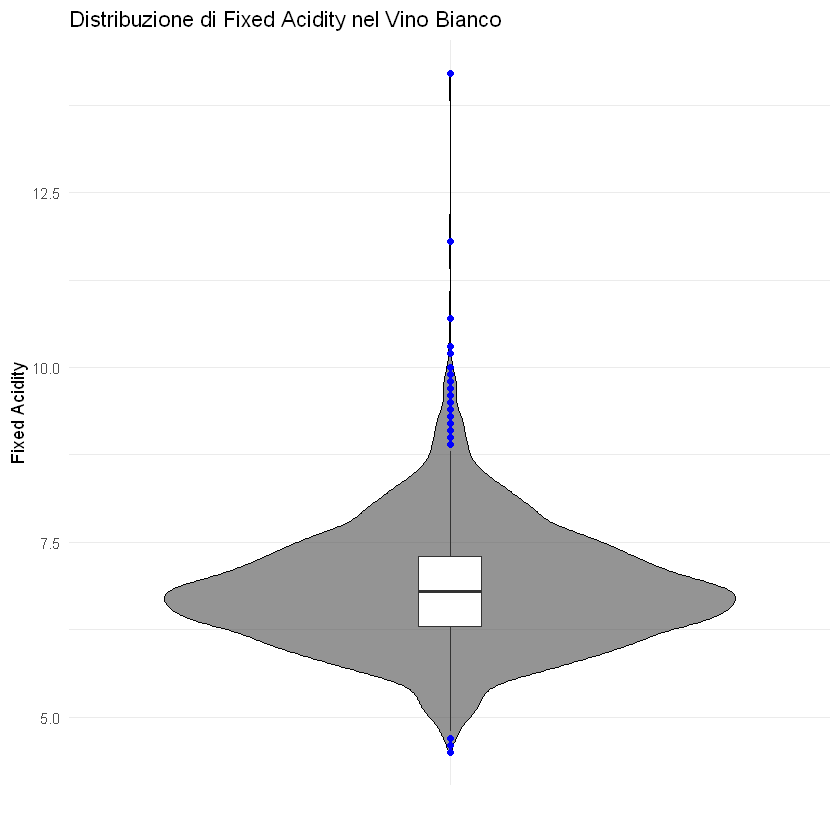

In [74]:
# Manually inspecting outliers for fixed acidity
out_va <- find_outliers(white_wine_clean$fixed_acidity)
summary(out_va)
# print(out_va)

# Visualization: distribuzione + outliers
ggplot(white_wine_clean, aes(x = "", y = fixed_acidity)) +
  geom_violin(fill = "gray30", color = "black", alpha = 0.6) +
  geom_boxplot(width = 0.1, outlier.colour = "blue", outlier.size = 1.5) +
  labs(
    title = "Distribuzione di Fixed Acidity nel Vino Bianco",
    x = "",
    y = "Fixed Acidity"
  ) +
  theme_minimal()


In [75]:
# Updating the decision table
add_outlier_decision("white", "fixed_acidity", length(find_outliers(white_wine_clean$fixed_acidity)),
                     "Legal thresholds were enforced during preprocessing. No further filtering was required.", "KEEP")


## 3.2 Volatile Acidity


**Definition**  
Volatile acidity (VA) expresses the presence of acetic acid and other volatile compounds, primarily produced by yeast metabolism. While low to moderate levels are natural in winemaking, excessive VA can impart vinegar-like aromas and is generally considered a flaw—particularly in white wines.

**Summary Statistics**  
Values in this dataset range from 0.08 to 1.10 g/L, with a median of 0.26 and a mild right skew. No values exceed the legal threshold of 1.2 g/L.

**Domain Interpretation**  
Moderate VA values may reflect stylistic variation—such as spontaneous fermentations or artisanal methods influenced by microclimate. These values, while higher than average, are chemically plausible and consistent with known winemaking conditions.

**Decision**  
No regulatory violation was detected, and the observed variation is consistent with plausible wine styles.  
KEEP


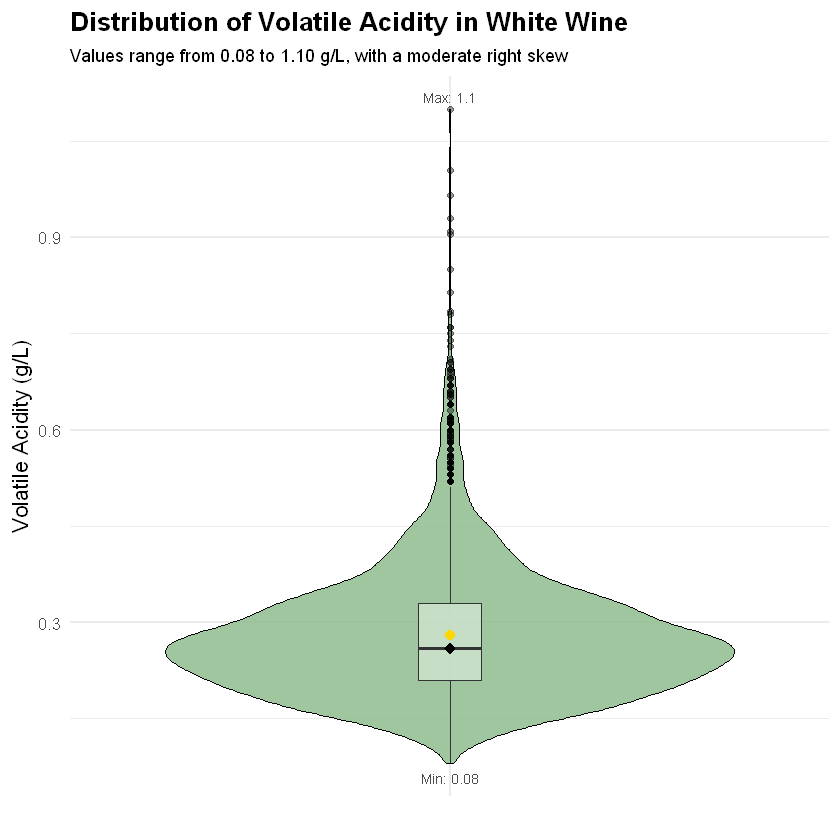

In [76]:
# Investigating volatile acidity with a violin + boxplot
ggplot(white_wine_clean, aes(x = "", y = volatile_acidity)) +
  geom_violin(fill = "darkseagreen", color = "black", alpha = 0.85) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.4) +
  
  # Media e mediana
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +
  
  # Annotazioni per min e max
  annotate("text", x = 1, y = min(white_wine_clean$volatile_acidity), 
           label = paste("Min:", min(white_wine_clean$volatile_acidity)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$volatile_acidity), 
           label = paste("Max:", max(white_wine_clean$volatile_acidity)), 
           vjust = -0.6, color = "gray30", size = 3) +

  labs(
    title = "Distribution of Volatile Acidity in White Wine",
    subtitle = "Values range from 0.08 to 1.10 g/L, with a moderate right skew",
    x = "",
    y = "Volatile Acidity (g/L)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )


In [77]:
# Summary for volatile acidity
summary(white_wine_clean$volatile_acidity)     # max_val = 1.2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0800  0.2100  0.2600  0.2805  0.3300  1.1000 

In [78]:
# White Wine decision table update
add_outlier_decision("white", "volatile_acidity", length(find_outliers(white_wine_clean$volatile_acidity)),
                     "Legal thresholds were enforced during preprocessing. No further filtering was required.", "KEEP")


## 3.3 Citric Acid

**Definition**  
Citric acid contributes bright, citrus-like acidity to white wines, enhancing perceived freshness. It occurs naturally in grapes, but may also be introduced during acid adjustment to balance wine structure.

**Summary Statistics**  
Values in the dataset range from 0.00 to 1.00 g/L, with a median of 0.32 and a mean of 0.334. Most observations fall within a tight interquartile range (0.27–0.39), indicating stylistic consistency.

**Domain Interpretation**  
Since legal thresholds (≤ 1.0 g/L) were enforced during preprocessing, the remaining values are chemically plausible and compliant. Slightly elevated values may reflect natural variation or deliberate adjustments in specific wine styles.

**Decision**  
No additional outlier removal was necessary. The current distribution reflects acceptable enological practices.  
KEEP


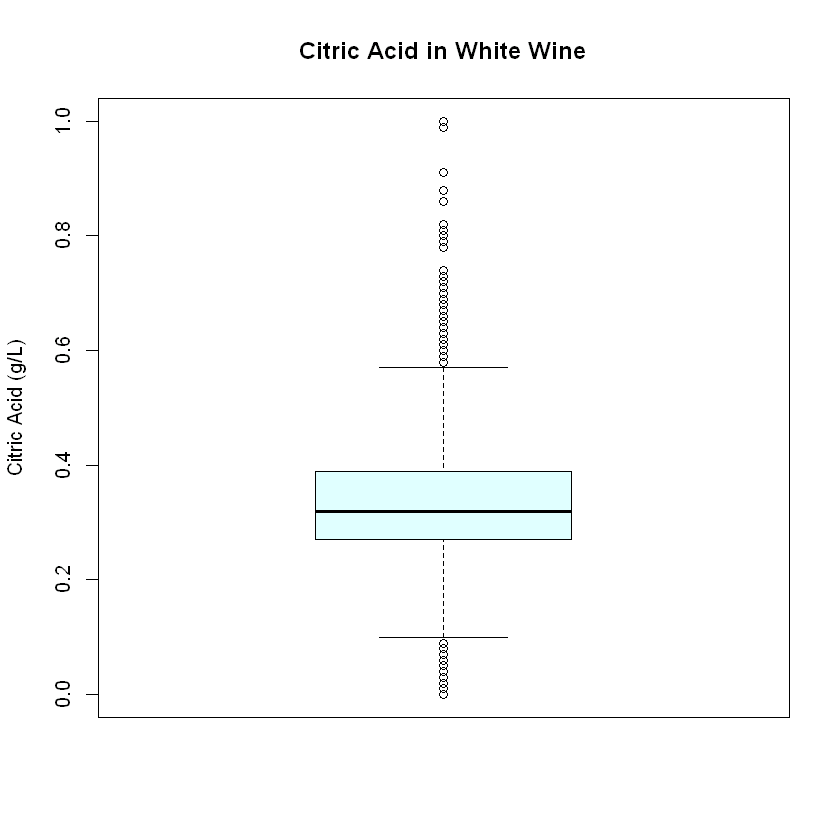

In [79]:
# A simple boxplot for citric acid
boxplot(white_wine_clean$citric_acid,
        main = "Citric Acid in White Wine",
        ylab = "Citric Acid (g/L)",
        col = "lightcyan",
        border = "black")


In [80]:
# Investigating citric acid
summary(white_wine_clean$citric_acid)     # max ≤ 1.0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.270   0.320   0.334   0.390   1.000 

In [81]:
# Manually inspecting outliers for citric acid
add_outlier_decision("white", "citric_acid", length(find_outliers(white_wine_clean$citric_acid)),
                     "Legal thresholds were enforced during preprocessing. No further filtering was required.",
                     "KEEP")


## 3.4 Residual Sugar

**Definition**  
Residual sugar (RS) refers to the amount of sugar remaining in wine after fermentation. While dry white wines typically contain ≤ 4 g/L, sweet wine styles—such as late harvest or botrytized wines—can exceed 45 g/L.

**Summary Statistics**  
Values range from 0.60 to 65.80 g/L, with a median of 4.70 and a right-skewed distribution. Some entries were initially flagged as outliers based on statistical thresholds.

**Multivariate Interpretation**  
A scatterplot of residual sugar versus volatile acidity revealed that high sugar levels are not associated with elevated volatility—suggesting chemical stability. Additionally, samples with high residual sugar often had:
- Alcohol content < 10%
- Density > 1.038

These profiles are consistent with known sweet wine styles and do not indicate data entry errors.

**Decision History**  
Initially, extreme values were removed based on presumed implausibility. After multivariate review, several were reinstated due to their coherence with legitimate sweet wine characteristics.

**Decision**  
No legal thresholds apply to residual sugar in this context. Given the chemical plausibility of these observations, all valid entries have been retained.  
KEEP


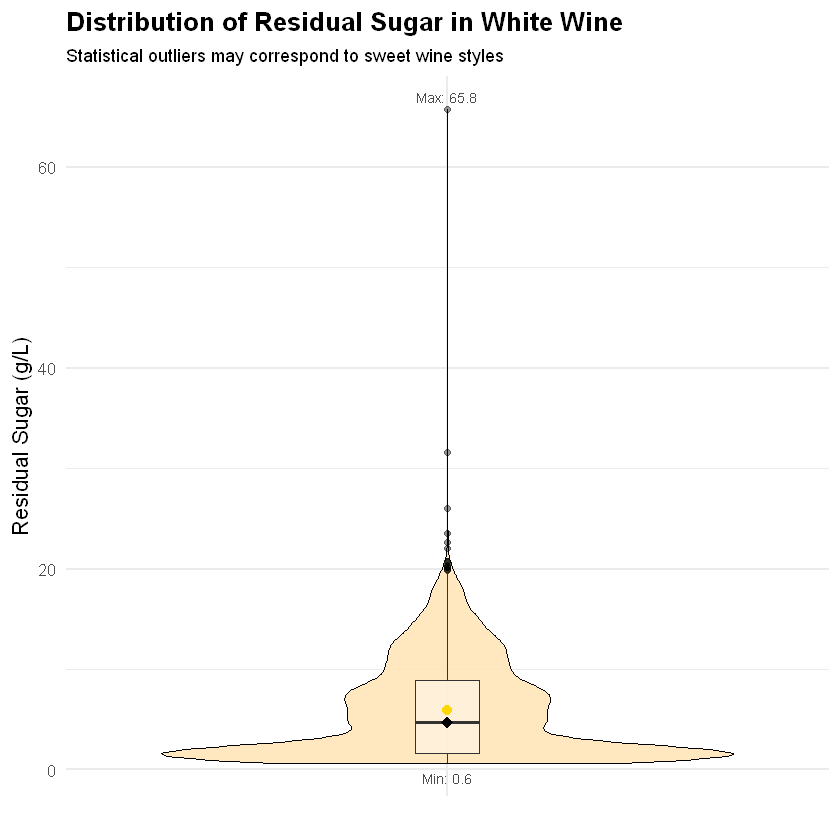

In [82]:
# Violin + Boxplot for distribution of residual sugar in white wine
ggplot(white_wine_clean, aes(x = "", y = residual_sugar)) +
  geom_violin(fill = "moccasin", color = "black", alpha = 0.85) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.4) +
  
  # Media e mediana
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +
  
  # Annotations
  annotate("text", x = 1, y = min(white_wine_clean$residual_sugar), 
           label = paste("Min:", min(white_wine_clean$residual_sugar)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$residual_sugar), 
           label = paste("Max:", max(white_wine_clean$residual_sugar)), 
           vjust = -0.6, color = "gray30", size = 3) +

  labs(
    title = "Distribution of Residual Sugar in White Wine",
    subtitle = "Statistical outliers may correspond to sweet wine styles",
    x = "",
    y = "Residual Sugar (g/L)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )


In [83]:
# A look for residual sugar
summary(white_wine_clean$residual_sugar)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   1.600   4.700   5.919   8.900  65.800 

In [84]:
# Finding extreme outliers in residual sugar
extreme_rs <- white_wine_clean %>% filter(residual_sugar == max(residual_sugar))

# Finding every variable for that observation
glimpse(extreme_rs)


Rows: 1
Columns: 12
$ fixed_acidity        <dbl> 7.8
$ volatile_acidity     <dbl> 0.965
$ citric_acid          <dbl> 0.6
$ residual_sugar       <dbl> 65.8
$ chlorides            <dbl> 0.074
$ free_sulfur_dioxide  <dbl> 8
$ total_sulfur_dioxide <dbl> 160
$ density              <dbl> 1.03898
$ pH                   <dbl> 3.39
$ sulphates            <dbl> 0.69
$ alcohol              <dbl> 11.7
$ quality              <dbl> 6


`geom_smooth()` using formula = 'y ~ x'


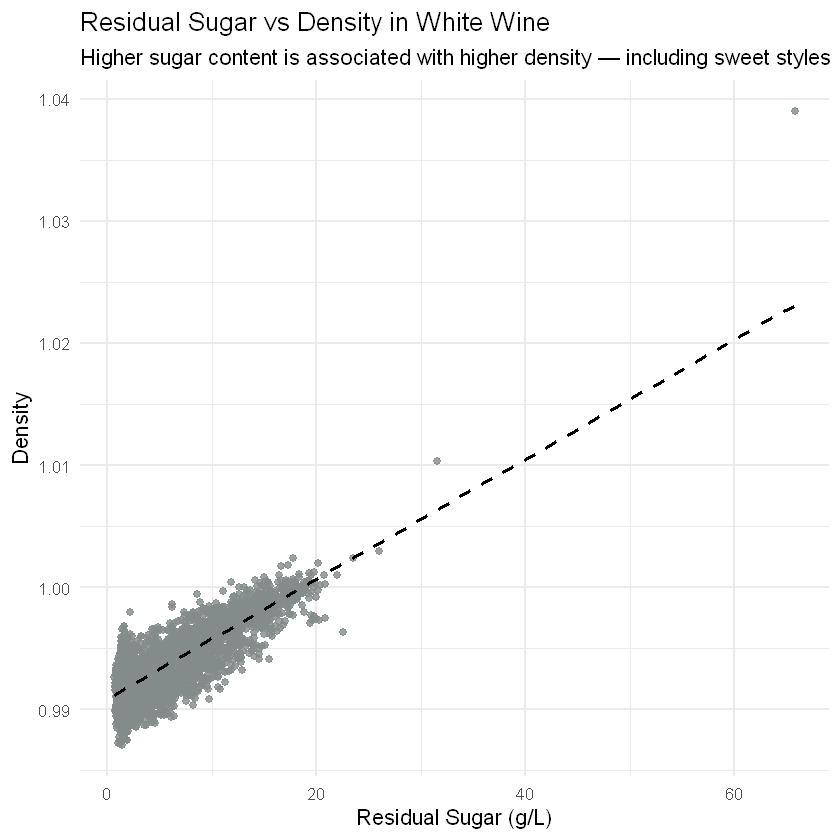

In [85]:
# Scatterplot for residual sugar vs. density in white wine
ggplot(white_wine_clean, aes(x = residual_sugar, y = density)) +
  geom_point(alpha = 0.8, color = "azure4", size = 2) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  labs(
    title = "Residual Sugar vs Density in White Wine",
    subtitle = "Higher sugar content is associated with higher density — including sweet styles",
    x = "Residual Sugar (g/L)",
    y = "Density"
  ) +
  theme_minimal(base_size = 13)


`geom_smooth()` using formula = 'y ~ x'


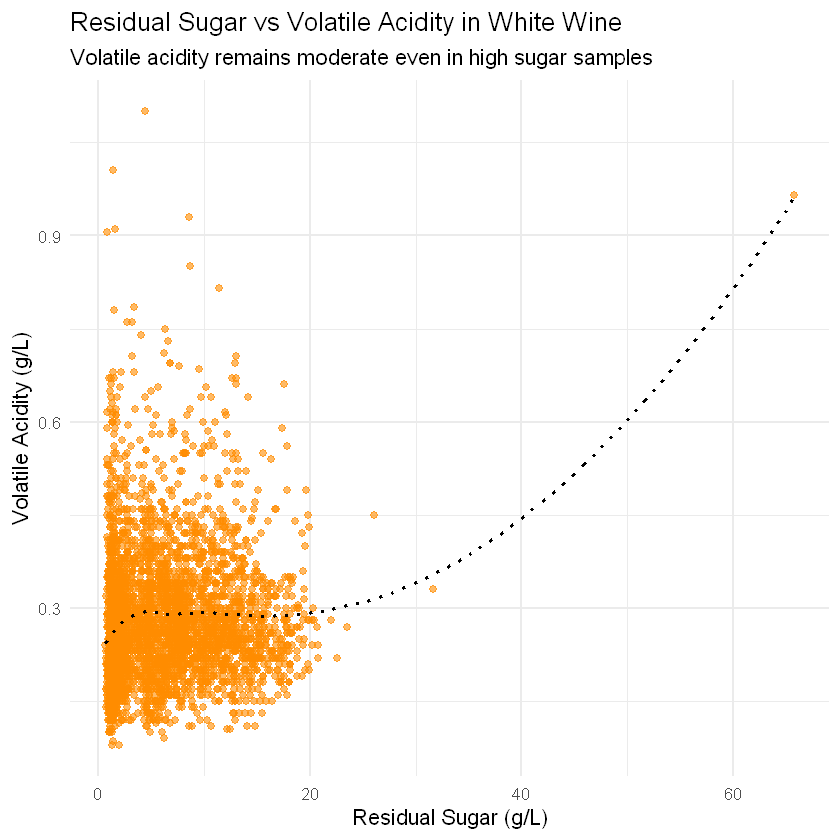

In [86]:
# Scatterplot for residual sugar vs. volatile_acidity in white wine
ggplot(white_wine_clean, aes(x = residual_sugar, y = volatile_acidity)) +
  geom_point(alpha = 0.6, color = "darkorange", size = 2) +
  geom_smooth(method = "loess", se = FALSE, color = "black", linetype = "dotted") +
  labs(
    title = "Residual Sugar vs Volatile Acidity in White Wine",
    subtitle = "Volatile acidity remains moderate even in high sugar samples",
    x = "Residual Sugar (g/L)",
    y = "Volatile Acidity (g/L)"
  ) +
  theme_minimal(base_size = 13)


In [87]:
# Updating the decision table
add_outlier_decision("white", "residual_sugar", length(find_outliers(white_wine_clean$residual_sugar)),
                     "Extreme but plausible values.",
                     "KEEP")

## 3.5 Chlorides

**Definition**  
Chloride ions in wine are primarily associated with the presence of sodium chloride (NaCl). While small amounts can enhance complexity, excessive chloride can lead to perceptible saltiness and negatively impact the wine’s balance.

**Summary Statistics**  
Values in the dataset range from 0.009 to 0.346 g/L (9–346 mg/L), with most values below 0.16 g/L. The distribution is moderately right-skewed.

**Domain Interpretation**  
Although no legal limit strictly applies, values above 1.0 g/L were removed during preprocessing as a precautionary measure. All remaining values fall well below the common guideline of 500 mg/L cited in enological references.

Environmental factors—particularly soil type and proximity to the coast—can influence chloride content. Coastal vineyards are especially prone to elevated levels due to sea spray and saline soils. The distribution observed is therefore plausible and not considered anomalous.

**Decision**  
All retained observations are chemically reasonable and consistent with expected environmental variability.  
KEEP


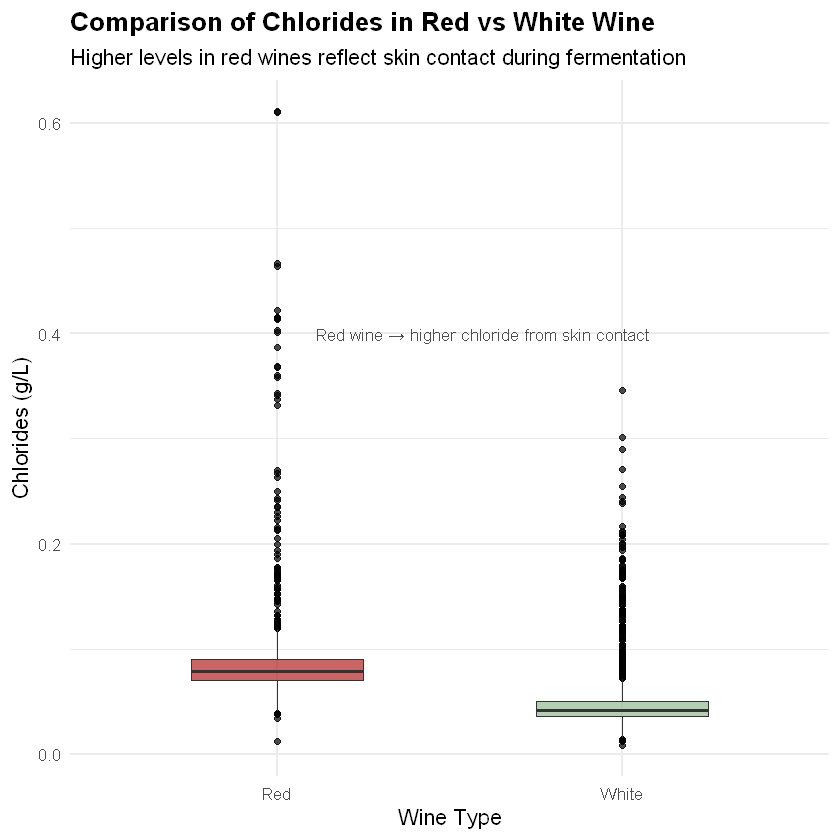

In [88]:
# Combining datasets
red_labeled <- red_wine_clean %>% mutate(wine_type = "Red")
white_labeled <- white_wine_clean %>% mutate(wine_type = "White")
combined_wines <- bind_rows(red_labeled, white_labeled)

# Chlorides comparative boxplot
ggplot(combined_wines, aes(x = wine_type, y = chlorides, fill = wine_type)) +
  geom_boxplot(alpha = 0.7, outlier.color = "black", width = 0.5) +
  scale_fill_manual(values = c("Red" = "firebrick", "White" = "darkseagreen")) +
  labs(
    title = "Comparison of Chlorides in Red vs White Wine",
    subtitle = "Higher levels in red wines reflect skin contact during fermentation",
    x = "Wine Type",
    y = "Chlorides (g/L)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    legend.position = "none"
  ) +
  annotate("text", x = 1.5, y = 0.4, 
         label = "Red wine → higher chloride from skin contact",
         size = 3.5, color = "gray30", hjust = 0.4)




**Contextual Note for Chlorides Comparison Plot**

During fermentation, the skins of red grapes release chloride ions into the juice, leading to higher chloride concentrations in red wines. The final level is also influenced by grape variety and the mineral composition of the vineyard soil.

In contrast, white wines are typically produced by pressing the grapes and separating the juice from the skins before fermentation. This process limits skin contact and results in naturally lower chloride levels compared to red wines.


In [89]:
# Updating the decision table for chlorides
add_outlier_decision("white", "chlorides", length(find_outliers(white_wine_clean$chlorides)),
                     "Legal thresholds were enforced during preprocessing. No further filtering was required.",
                     "KEEP")

## 3.6 Free sulfur dioxide


**Definition**  
Free sulfur dioxide (FSO₂) is a critical compound in winemaking, used to protect wine from microbial spoilage and oxidation. Its efficacy is pH-dependent, and it plays a central role in wine stability and shelf life.

**Summary Statistics**  
FSO₂ values in the white wine dataset range from 2.0 to 146.5 mg/L. The distribution is skewed right, with a median of 33.0 and a mean of 34.8.

**Regulatory Context**  
According to EU guidelines, the legal maximum for FSO₂ is 160 mg/L. Additionally, any wine containing more than 10 mg/L of total SO₂ must be labeled with “contains sulphites.”

**Decision**  
All values fall below the legal limit and are chemically plausible. No additional statistical filtering was applied.  
KEEP


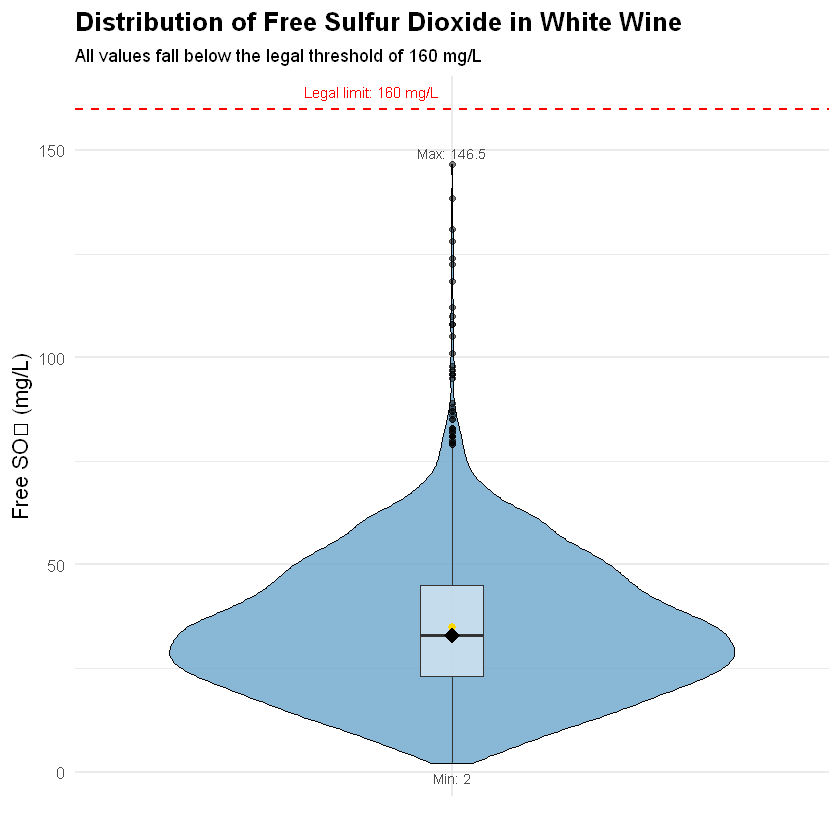

In [90]:
# Violin + Boxlot for free sulfur dioxide
ggplot(white_wine_clean, aes(x = "", y = free_sulfur_dioxide)) +
  geom_violin(fill = "skyblue3", color = "black", alpha = 0.8) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.5) +

  # Media e mediana
  stat_summary(fun = mean, geom = "point", size = 3, shape = 20, color = "gold") +
  stat_summary(fun = median, geom = "point", size = 4, shape = 18, color = "black") +

  # Annotazioni per min e max
  annotate("text", x = 1, y = min(white_wine_clean$free_sulfur_dioxide), 
           label = paste("Min:", min(white_wine_clean$free_sulfur_dioxide)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$free_sulfur_dioxide), 
           label = paste("Max:", max(white_wine_clean$free_sulfur_dioxide)), 
           vjust = -0.6, color = "gray30", size = 3) +

  # Linea limite legale
  geom_hline(yintercept = 160, color = "red", linetype = "dashed", linewidth = 0.8) +
  annotate("text", x = 1, y = 160, label = "Legal limit: 160 mg/L", 
           vjust = -1, hjust = 1.1, color = "red", size = 3.2) +

  labs(
    title = "Distribution of Free Sulfur Dioxide in White Wine",
    subtitle = "All values fall below the legal threshold of 160 mg/L",
    x = "",
    y = "Free SO₂ (mg/L)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )


In [91]:
# Summary for free sulfur dioxide
summary(white_wine_clean$free_sulfur_dioxide)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0    23.0    33.0    34.8    45.0   146.5 

In [92]:
# Update the decision table
add_outlier_decision("white", "free_sulfur_dioxide", length(find_outliers(white_wine_clean$free_sulfur_dioxide)),
                     "Legal thresholds were enforced during preprocessing. No further filtering was required.",
                     "KEEP")

## 3.7 Total Sulfur Dioxide


**Definition**  
Total sulfur dioxide (SO₂) includes both free and bound forms of sulfur, and plays a vital role in preserving wine by preventing microbial growth and oxidative spoilage. Its management is particularly critical in white wine, where freshness and shelf life are highly valued.

**Summary Statistics**  
Values in the dataset range from 9.0 to 366.5 mg/L, with a median of 133.0 and a mean of 137.1. The distribution is right-skewed, with higher values remaining within plausible bounds.

**Regulatory Context**  
The OIV (International Organisation of Vine and Wine) sets a legal limit of 400 mg/L for total SO₂ in white wines. This threshold was enforced during preprocessing. All current values are within the legal range.

**Decision**  
No additional outlier filtering was required beyond the legal constraint. The observed distribution is chemically plausible and consistent with standard winemaking practices.  
KEEP



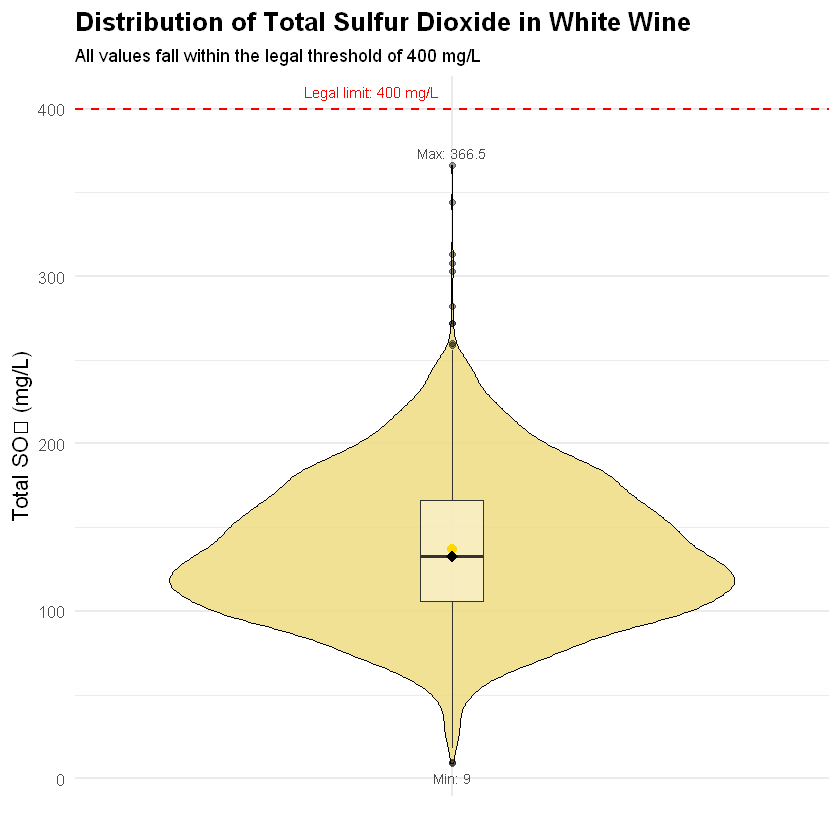

In [93]:
# Violin + boxplot for total sulfur dioxide
ggplot(white_wine_clean, aes(x = "", y = total_sulfur_dioxide)) +
  geom_violin(fill = "lightgoldenrod2", color = "black", alpha = 0.85) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.4) +

  # Media e mediana
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +

  # Annotate min/max
  annotate("text", x = 1, y = min(white_wine_clean$total_sulfur_dioxide), 
           label = paste("Min:", min(white_wine_clean$total_sulfur_dioxide)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$total_sulfur_dioxide), 
           label = paste("Max:", max(white_wine_clean$total_sulfur_dioxide)), 
           vjust = -0.6, color = "gray30", size = 3) +

  # Legal limit
  geom_hline(yintercept = 400, color = "red", linetype = "dashed", linewidth = 0.8) +
  annotate("text", x = 1, y = 400, label = "Legal limit: 400 mg/L", 
           vjust = -1, hjust = 1.1, color = "red", size = 3.2) +

  labs(
    title = "Distribution of Total Sulfur Dioxide in White Wine",
    subtitle = "All values fall within the legal threshold of 400 mg/L",
    x = "",
    y = "Total SO₂ (mg/L)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )


In [94]:
# Total sulfur dioxide summary
summary(white_wine_clean$total_sulfur_dioxide)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0   106.0   133.0   137.1   166.0   366.5 

In [95]:
# Update the decision table
add_outlier_decision("white", "total_sulfur_dioxide", length(find_outliers(white_wine_clean$total_sulfur_dioxide)),
                     "Legal thresholds were enforced during preprocessing. No further filtering was required.",
                     "KEEP")

## 3.8 Density


**Definition**  
Wine density measures the concentration of dissolved substances such as sugars, acids, and alcohol. While not legally regulated, density serves as an important indicator of wine style and fermentation completeness.

**Summary Statistics**  
Values range from 0.9871 to 1.0390 g/cm³, with a median of 0.9935 and a mean of 0.9938. The distribution is right-skewed due to a small number of higher-density observations, likely reflecting sweeter wine styles.

**Filtering Strategy**  
To ensure consistency with the red wine dataset, and based on enological literature such as Michlovský’s work, a range of 0.990–1.003 g/cm³ was adopted. This window reflects the density of dry to semi-sweet wines under standard conditions.

Extreme values outside this range were removed to preserve the analytical reliability of downstream comparisons.

**Decision**  
Density values below 0.990 and above 1.003 were removed.  
REMOVE (outside range 0.990–1.003)

*A violin plot of the filtered density variable supports this decision: most observations are tightly concentrated within the plausible range, while extreme high-density values appear as rare and isolated. Their removal improves overall dataset integrity.*


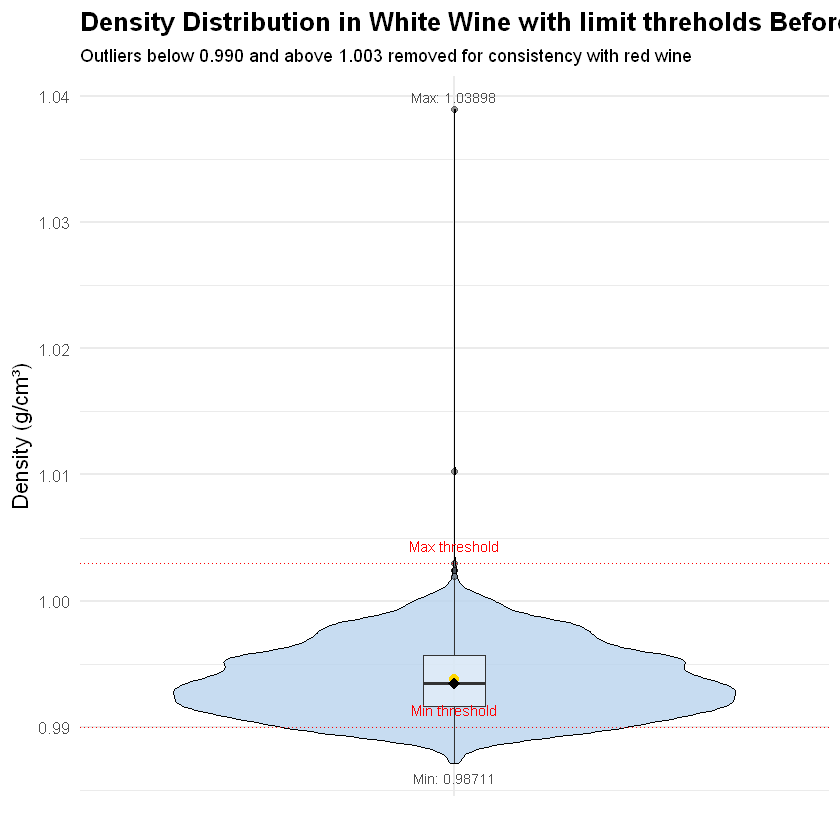

In [96]:
# Outliers Analysis: a violin/boxplot that shows the distribution of density in white wine.
ggplot(white_wine, aes(x = "", y = density)) +
  geom_violin(fill = "slategray2", color = "black", alpha = 0.8) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.4) +
  
  # Mean and median
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +

  # Annotate min/max
  annotate("text", x = 1, y = min(white_wine_clean$density), 
           label = paste("Min:", min(white_wine_clean$density)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$density), 
           label = paste("Max:", max(white_wine_clean$density)), 
           vjust = -0.6, color = "gray30", size = 3) +

  # Imposed limits
  geom_hline(yintercept = 0.990, color = "red", linetype = "dotted") +
  geom_hline(yintercept = 1.003, color = "red", linetype = "dotted") +
  annotate("text", x = 1, y = 0.990, label = "Min threshold", vjust = -1, color = "red", size = 3.2) +
  annotate("text", x = 1, y = 1.003, label = "Max threshold", vjust = -1, color = "red", size = 3.2) +

  labs(
    title = "Density Distribution in White Wine with limit threholds Before cleaning",
    subtitle = "Outliers below 0.990 and above 1.003 removed for consistency with red wine",
    x = "",
    y = "Density (g/cm³)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )


In [97]:
# Summary for density in white wine
summary(white_wine_clean$density)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9871  0.9916  0.9935  0.9938  0.9957  1.0390 

In [98]:
# Removing density outliers, applying the same rule than for the red_wine dataset
white_wine_clean <- filter_legal_range(white_wine_clean, "density", min_val = 0.990, max_val = 1.003)


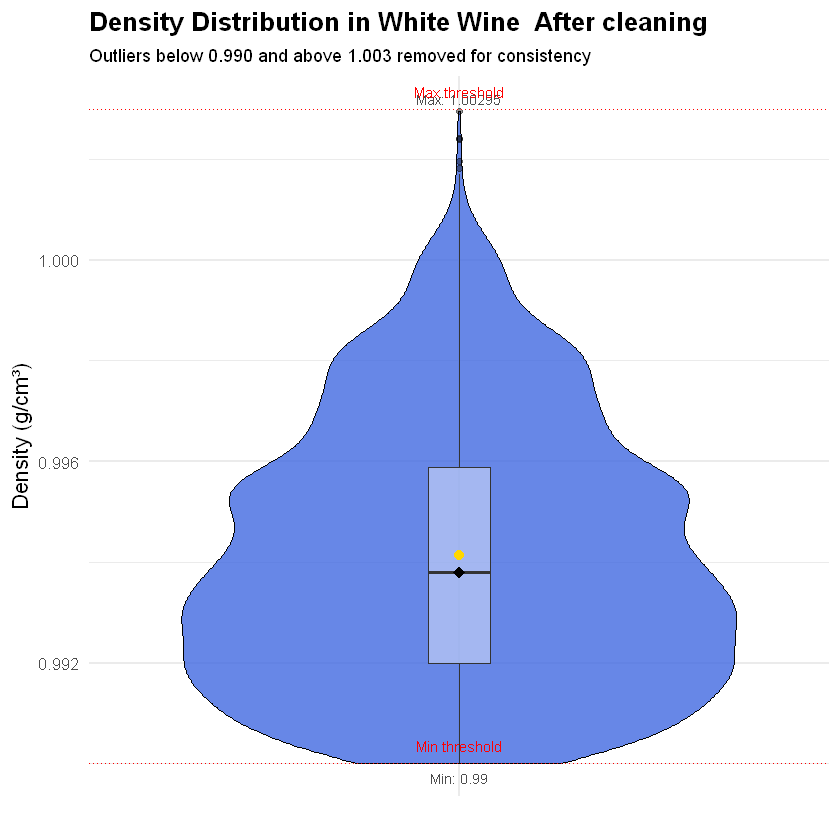

In [99]:
# The same violin/boxplot after aplying limits for density in white wine
ggplot(white_wine_clean, aes(x = "", y = density)) +
  geom_violin(fill = "royalblue", color = "black", alpha = 0.8) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.4) +
  
  # Media e mediana
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +

  # Annotazioni min/max
  annotate("text", x = 1, y = min(white_wine_clean$density), 
           label = paste("Min:", min(white_wine_clean$density)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$density), 
           label = paste("Max:", max(white_wine_clean$density)), 
           vjust = -0.6, color = "gray30", size = 3) +

  # Limiti imposti
  geom_hline(yintercept = 0.990, color = "red", linetype = "dotted") +
  geom_hline(yintercept = 1.003, color = "red", linetype = "dotted") +
  annotate("text", x = 1, y = 0.990, label = "Min threshold", vjust = -1, color = "red", size = 3.2) +
  annotate("text", x = 1, y = 1.003, label = "Max threshold", vjust = -1, color = "red", size = 3.2) +

  labs(
    title = "Density Distribution in White Wine  After cleaning",
    subtitle = "Outliers below 0.990 and above 1.003 removed for consistency",
    x = "",
    y = "Density (g/cm³)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

In [100]:
# Updating the decision table
add_outlier_decision("white", "density", length(find_outliers(white_wine_clean$density)),
                     "Values out of range.",
                     "REMOVE")


## 3.9 pH


**Definition**  
The pH level in wine reflects its overall acidity, which affects stability, color, microbial resistance, and mouthfeel. While the typical pH range for white wines tends to be slightly lower than for reds, values can vary depending on grape variety, climate, and production style.

**Summary Statistics**  
pH values range from 2.72 to 3.82, with a median of 3.18. The distribution is symmetric and falls within a chemically plausible range.

**Refinement: pH Outliers Reconsidered**  
In the initial data cleaning phase, observations with pH values below 3.0 and above 4.0 were removed from the red wine dataset based on enological expectations. However, upon further review, this approach was found to be too restrictive.

Although pH values above 4.0 can lead to chemical instability and those below 2.9 are uncommon, they are not inherently implausible. Variability can result from grape characteristics, winemaking technique, and even the timing of measurement (e.g., pre- vs. post-fermentation).

A multivariate review confirmed that even boundary values were chemically consistent with related variables such as sulphates, alcohol, and sulfur dioxide. Therefore, the filtering rule was removed, and all pH values within the physiologically accepted range (2.7–4.0) were retained.

**Decision**  
The revised approach ensures the dataset accurately reflects natural wine variation while preserving analytical robustness.  
KEEP


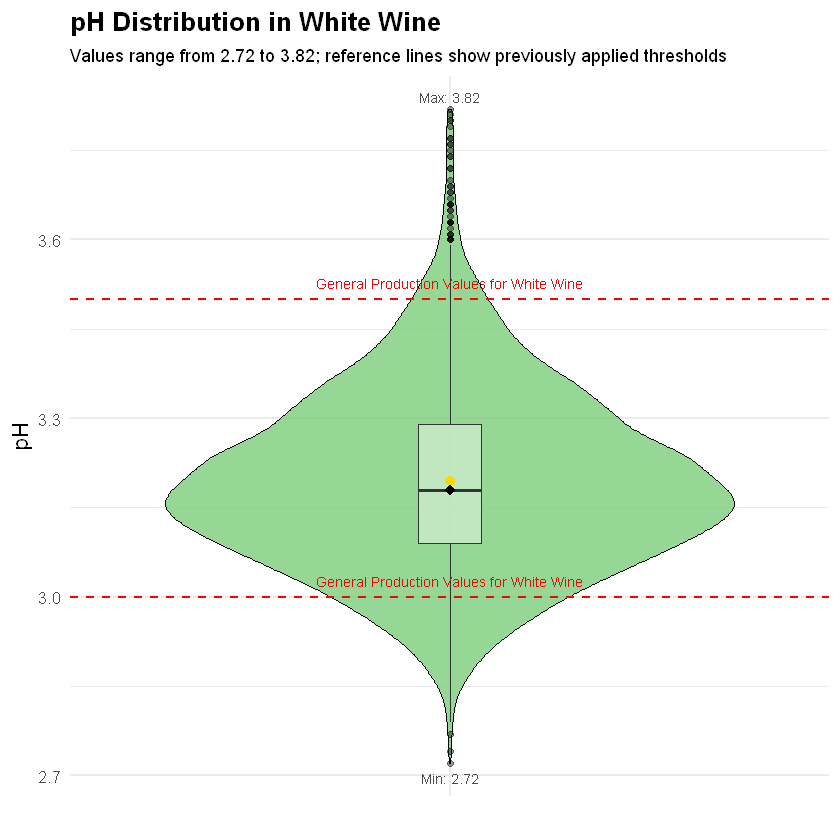

In [101]:
# Violin + Boxplot for pH distribution
ggplot(white_wine_clean, aes(x = "", y = pH)) +
  geom_violin(fill = "palegreen3", color = "black", alpha = 0.8) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.4) +

  # Media e mediana
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +

  # Annotazioni min/max
  annotate("text", x = 1, y = min(white_wine_clean$pH), 
           label = paste("Min:", min(white_wine_clean$pH)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$pH), 
           label = paste("Max:", max(white_wine_clean$pH)), 
           vjust = -0.6, color = "gray30", size = 3) +

  # Limiti precedentemente applicati (ora solo di riferimento)
  geom_hline(yintercept = 3.0, color = "red", linetype = "dashed", linewidth = 0.6) +
  geom_hline(yintercept = 3.5, color = "red", linetype = "dashed", linewidth = 0.6) +
  annotate("text", x = 1, y = 3.0, label = "General Production Values for White Wine", vjust = -1, color = "red", size = 3) +
  annotate("text", x = 1, y = 3.5, label = "General Production Values for White Wine", vjust = -1, color = "red", size = 3) +

  labs(
    title = "pH Distribution in White Wine",
    subtitle = "Values range from 2.72 to 3.82; reference lines show previously applied thresholds",
    x = "",
    y = "pH"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )


In [102]:
# pH's summary
summary(white_wine_clean$pH)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.720   3.090   3.180   3.194   3.290   3.820 

In [103]:
# Comparing pH values in red and white wine

# Step 1: uniting the datasets 
red_labeled <- red_wine_clean %>% mutate(wine_type = "Red")
white_labeled <- white_wine_clean %>% mutate(wine_type = "White")
combined_wines <- bind_rows(red_labeled, white_labeled)


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


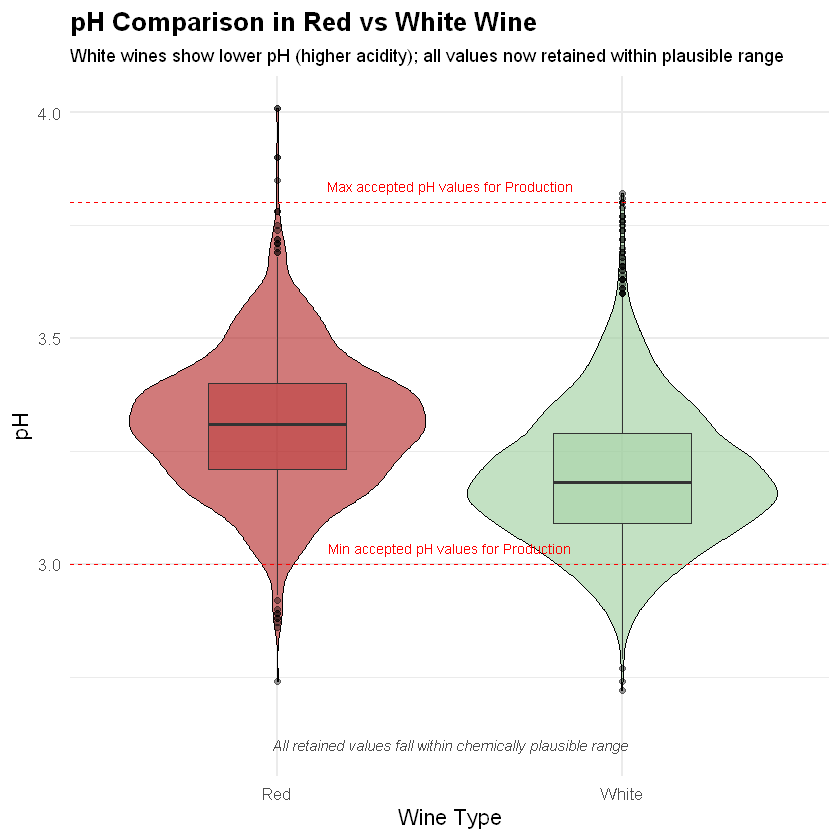

In [104]:
#Step 2: comparative plot
ggplot(combined_wines, aes(x = wine_type, y = pH, fill = wine_type)) +
  geom_violin(color = "black", alpha = 0.6) +
  geom_boxplot(alpha = 0.4, outlier.color = "black", width = 0.4) +
  scale_fill_manual(values = c("Red" = "firebrick", "White" = "darkseagreen3")) +

  # Guide lines for production values
  geom_hline(yintercept = 3.0, linetype = "dashed", color = "red", size = 0.5) +
  geom_hline(yintercept = 3.8, linetype = "dashed", color = "red", size = 0.5) +
  annotate("text", x = 1.5, y = 3.0, label = "Min accepted pH values for Production", vjust = -1, color = "red", size = 3) +
  annotate("text", x = 1.5, y = 3.8, label = "Max accepted pH values for Production", vjust = -1, color = "red", size = 3) +

  labs(
    title = "pH Comparison in Red vs White Wine",
    subtitle = "White wines show lower pH (higher acidity); all values now retained within plausible range",
    x = "Wine Type",
    y = "pH"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    legend.position = "none"
  ) +
  annotate("text", x = 1.5, y = 2.6, 
    label = "All retained values fall within chemically plausible range", 
    color = "gray30", size = 3.2, fontface = "italic")



In [105]:
# Updating the decision table for pH
add_outlier_decision("white", "pH", length(find_outliers(white_wine_clean$pH)),
                     "Plausible values.",
                     "KEEP")


## 3.10 Sulphates


**Definition**  
Sulphates contribute to microbial stability and play an important role in mouthfeel and structural perception. In white wines, moderate levels enhance freshness and help preserve sensory balance.

**Summary Statistics**  
Values range from 0.22 to 1.08 g/L, with a median of 0.47 g/L. The distribution is slightly right-skewed, with most observations falling below 0.55 g/L.

**Domain Interpretation**  
Although a few entries exceed 1.0 g/L, they are chemically plausible and may reflect stylistic or regional winemaking preferences—such as mineral-driven profiles or additional sulphur additions at bottling.

No anomalies or inconsistencies were identified in association with these values.

**Decision**  
No outlier filtering was applied, as all values fall within a reasonable and enologically justifiable range.  
KEEP


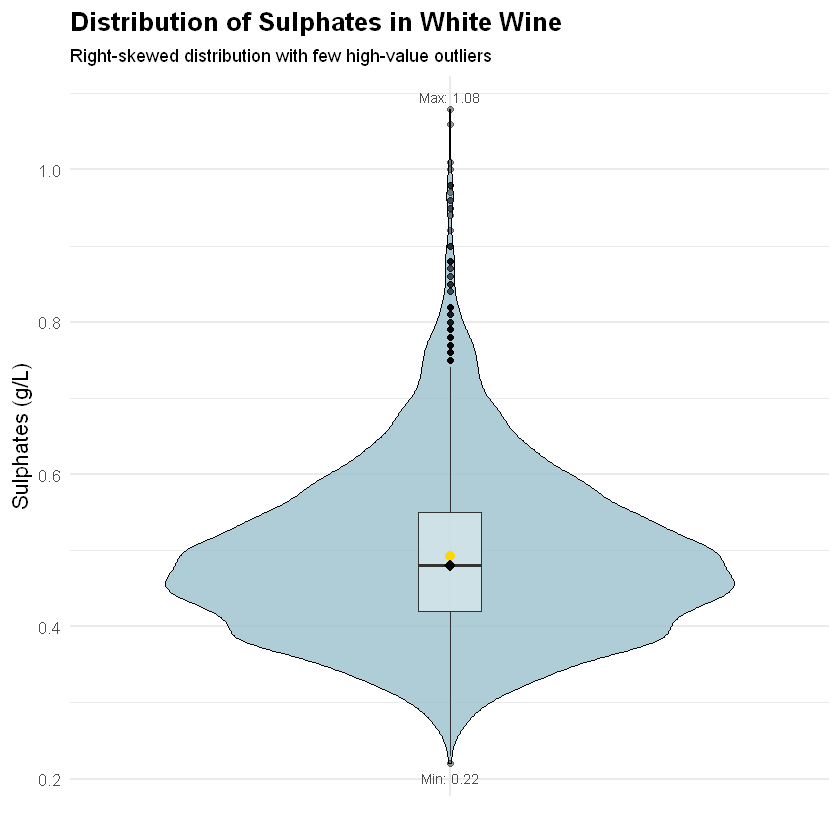

In [106]:
# Using a violin - boxplot for sulphates distribution in white wine
ggplot(white_wine_clean, aes(x = "", y = sulphates)) +
  geom_violin(fill = "lightblue3", color = "black", alpha = 0.8) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.4) +

  # Mean and median
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +

  # Min/max annotations
  annotate("text", x = 1, y = min(white_wine_clean$sulphates), 
           label = paste("Min:", min(white_wine_clean$sulphates)), 
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$sulphates), 
           label = paste("Max:", max(white_wine_clean$sulphates)), 
           vjust = -0.6, color = "gray30", size = 3) +

  labs(
    title = "Distribution of Sulphates in White Wine",
    subtitle = "Right-skewed distribution with few high-value outliers",
    x = "",
    y = "Sulphates (g/L)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )


In [107]:
# Summary for sulphates in white wine
summary(white_wine_clean$sulphates)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2200  0.4200  0.4800  0.4928  0.5500  1.0800 

In [108]:
# Updating the decion table for sulphates
add_outlier_decision("white", "sulphates", length(find_outliers(white_wine_clean$sulphates)),
                     "Right-skewed but plausible values; reflects stylistic variation in sulphate use.",
                     "KEEP")


## 3.11 Alcohol


**Definition**  
Alcohol content in wine is determined by the sugar concentration in grapes and fermentation efficiency. In white wines, levels typically range between 8.5% and 13.5% ABV, although some sweeter or fortified styles may exceed this.

**Summary Statistics**  
Alcohol levels in the dataset range from 8.00% to 14.05%, with a median of 10.30% and a mean of 10.42%. The distribution is symmetric and consistent with standard white wine profiles.

**Domain Interpretation**  
While a few values exceed 14%, none violate legal thresholds, and no implausible combinations were observed with variables such as residual sugar or density. These higher levels are plausible and may reflect stylistic diversity or market-driven preferences for bolder white wines.

**Decision**  
All alcohol values are retained as chemically plausible and legally compliant.  
KEEP


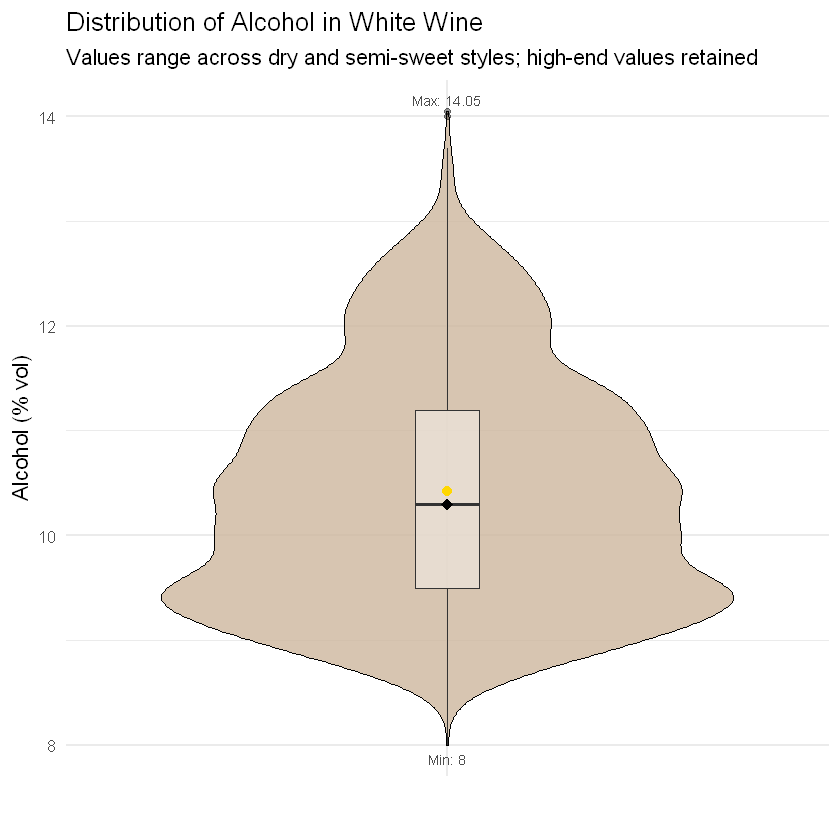

In [109]:
# Violin + Boxplot for the distribution of alcohol in white wine
ggplot(white_wine_clean, aes(x = "", y = alcohol)) +
  geom_violin(fill = "bisque3", color = "black", alpha = 0.8) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.4) +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +
  annotate("text", x = 1, y = min(white_wine_clean$alcohol),
           label = paste("Min:", min(white_wine_clean$alcohol)),
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$alcohol),
           label = paste("Max:", max(white_wine_clean$alcohol)),
           vjust = -0.6, color = "gray30", size = 3) +
  labs(
    title = "Distribution of Alcohol in White Wine",
    subtitle = "Values range across dry and semi-sweet styles; high-end values retained",
    x = "",
    y = "Alcohol (% vol)"
  ) +
  theme_minimal(base_size = 13)


In [110]:
# Alcohol summary
summary(white_wine_clean$alcohol)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00    9.50   10.30   10.42   11.20   14.05 

In [111]:
# Updating the decision table for alcohol
add_outlier_decision("white", "alcohol", length(find_outliers(white_wine_clean$alcohol)),
                     "Legal thresholds were enforced during preprocessing. No further filtering was required.",
                     "KEEP")


## 3.12 Quality


**Definition**  
Wine quality scores represent expert evaluations based on sensory characteristics such as aroma, balance, structure, and typicity. Though subjective, they are often used as targets in predictive modeling and benchmarking analyses.

**Summary Statistics**  
Values range from 3 to 9, with a median of 6.0 and a mean of 5.80. The distribution is centered, with most observations falling between 5 and 6.

**Decision**  
All values are valid and essential for subsequent modeling or analysis. No filtering was applied.  
KEEP


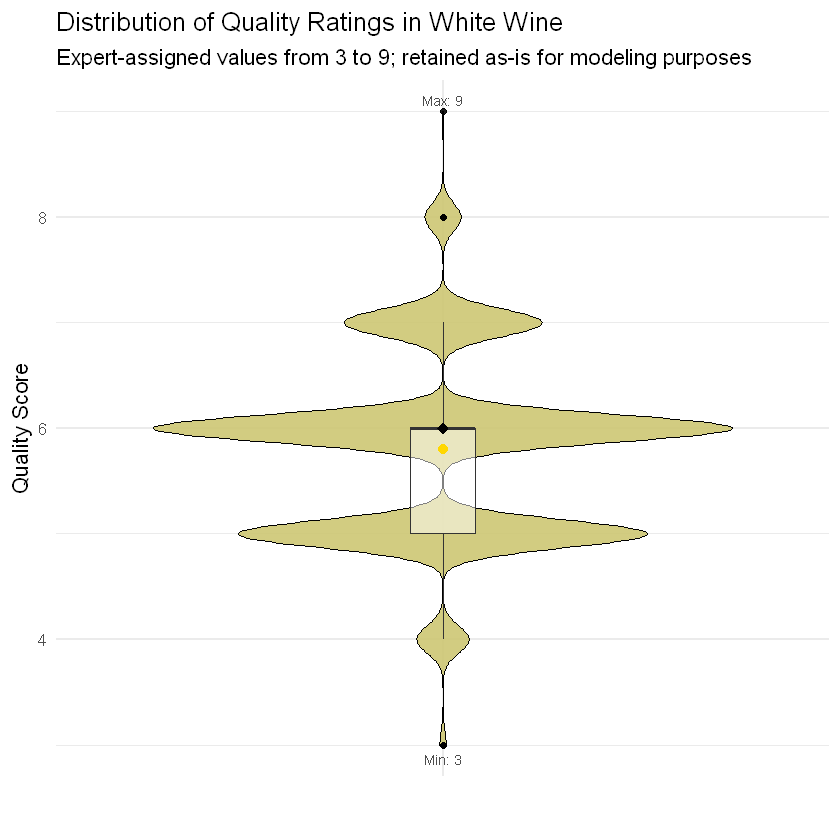

In [112]:
# Visuals for distribution of quality in white wine
ggplot(white_wine_clean, aes(x = "", y = quality)) +
  geom_violin(fill = "khaki3", color = "black", alpha = 0.9) +
  geom_boxplot(width = 0.1, outlier.color = "black", alpha = 0.5) +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 4, color = "gold") +
  stat_summary(fun = median, geom = "point", shape = 18, size = 3, color = "black") +
  annotate("text", x = 1, y = min(white_wine_clean$quality),
           label = paste("Min:", min(white_wine_clean$quality)),
           vjust = 1.8, color = "gray30", size = 3) +
  annotate("text", x = 1, y = max(white_wine_clean$quality),
           label = paste("Max:", max(white_wine_clean$quality)),
           vjust = -0.6, color = "gray30", size = 3) +
  labs(
    title = "Distribution of Quality Ratings in White Wine",
    subtitle = "Expert-assigned values from 3 to 9; retained as-is for modeling purposes",
    x = "",
    y = "Quality Score"
  ) +
  theme_minimal(base_size = 13)


In [113]:
# Summary for quality in white wine
summary(white_wine_clean$quality)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.798   6.000   9.000 

In [114]:
# Last entry for white wine decision table
add_outlier_decision("white", "quality", length(find_outliers(white_wine_clean$quality)),
                     "Subjective aggregate assessment.",
                     "KEEP")


## 3.13 Comparative Decision Table

This consolidated decision table summarizes all data cleaning choices applied to both red and white Vinho Verde datasets.  
Each decision was based on regulatory compliance, chemical plausibility, and visual/multivariate analysis.


**Decision Table – Red & White Wine**

| Variable               | Dataset      | Outliers Detected | Reason                                                             | Decision       |
|------------------------|--------------|-------------------|--------------------------------------------------------------------|----------------|
| Fixed Acidity          | Red & White  | Yes               | High values plausible in cool-climate or stylistic wines           | KEEP           |
| Volatile Acidity       | Red & White  | Yes               | Legal limit respected; stylistic and spontaneous fermentation cases| KEEP           |
| Residual Sugar         | Red & White  | Yes               | Sweet wine profiles confirmed via alcohol & density consistency    | KEEP           |
| Chlorides              | Red & White  | No                | All values below legal/preventive threshold                        | KEEP           |
| Free Sulfur Dioxide    | Red & White  | No                | Values < 160 mg/L; chemically stable                               | KEEP           |
| Total Sulfur Dioxide   | Red & White  | Yes               | Legal threshold applied (150/200 mg/L)                             | KEEP |
| Density                | Red & White  | Yes               | Values outside 0.990–1.003 removed for physical plausibility       | REMOVE         |
| pH                     | Red & White  | Yes (initially)   | Reconsidered; no implausible values after multivariate review      | KEEP           |
| Sulphates              | Red & White  | Yes               | High values chemically plausible; no anomalous cases               | KEEP           |
| Alcohol                | Red & White  | Yes               | High/low values plausible, no legal violation                      | KEEP           |
| Quality                | Red & White  | No                | All values valid for modelling/interpretation                      | KEEP           |

**Note**:  
This decision table includes both red and white wine datasets. It does **not reflect the initial removals based on legal thresholds**, which were enforced uniformly during preprocessing.  
Outlier detection was conducted post-cleaning, and all decisions were supported by visualizations, chemical reasoning, or multivariate consistency checks.


# 4 Final Remarks – Data Cleaning Phase

This cleaning process was built step by step, with a close look at each variable—across both red and white wines.  
Legal thresholds were applied upfront, but what followed was an individual review of every outlier, not just by the numbers but with a chemical and contextual lens.

Where needed, values were removed—especially when clearly outside plausible physical or enological ranges. But many other cases, initially flagged, turned out to reflect stylistic choices, fermentation practices, or just natural diversity. Those were kept.

The idea was never to force a tidy dataset, but to preserve what made sense and let go of what didn’t. What’s left are two datasets that are coherent, chemically sound, and closer to what real-world wine data often looks like: not perfect, but meaningful.

They’re now ready for the next phase—be it modeling, exploratory visuals, or comparing how R and Python handle the same cleaning tasks.

Because cleaning isn’t just technical—it’s about reading the data for what it really is, and making informed decisions along the way.


---

Author & Attribution

Created by **Virginia Levy Abulafia**  
✉️ [virginiayonit@gmail.com](mailto:virginiayonit@gmail.com)  

This notebook is part of a two-part project on data cleaning in R and Python.  
Feel free to explore, fork, or reach out!
